In [ ]:
import warnings
warnings.filterwarnings("ignore")

 Year  Maharastra EV Charging Stations  Maharastra CNG Stations  Maharastra Petrol/Diesel Stations  Delhi EV Charging Stations  Delhi CNG Stations  Delhi Petrol/Diesel Stations
 2025                              372                      689                               5317                          80                 498                           390
 2026                              428                      749                               5218                          93                 537                           377
 2027                              484                      809                               5119                         106                 576                           364
 2028                              541                      870                               5021                         119                 615                           352
 2029                              597                      930                               4922                 

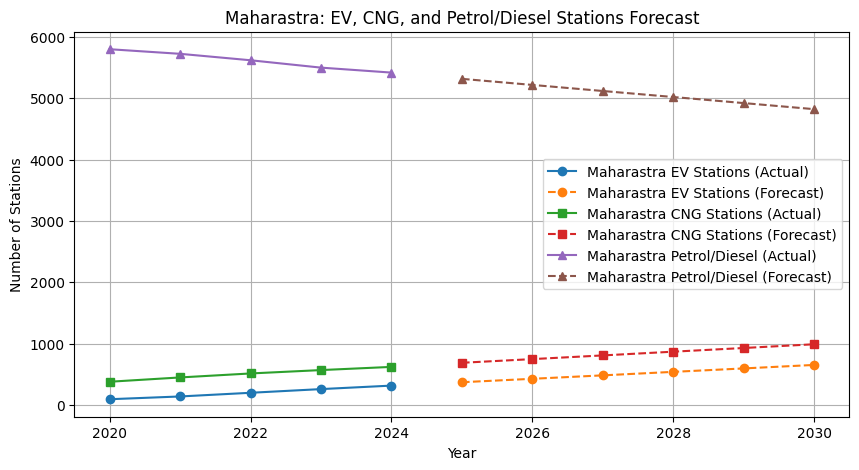

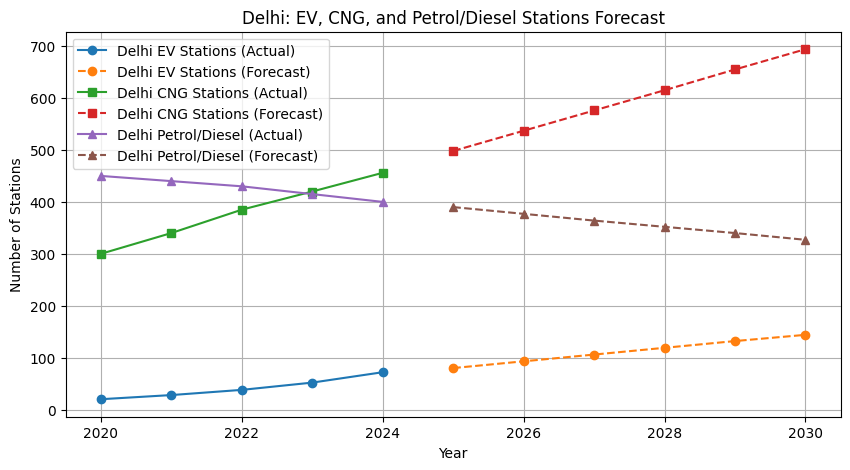

In [ ]:
#Charging & Fuel Station Growth Data(Maharastra & Delhi)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Data
data = pd.read_csv('/content/Charging_&_Fuel_Station_Growth_Data(MD).csv')

# Convert 'Year' to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Function to forecast using Linear Regression
def forecast_linear_regression(series, steps):
    years = np.array(range(len(series))).reshape(-1, 1)
    model = LinearRegression()
    model.fit(years, series)
    future_years = np.array(range(len(series), len(series) + steps)).reshape(-1, 1)
    forecast = model.predict(future_years)
    return np.round(forecast).astype(int)

# Forecasting for Maharastra
maharastra_data = data[data['City'] == 'Maharastra']
forecast_years = pd.date_range(start='2025', periods=6, freq='YE')

maharastra_ev_forecast = forecast_linear_regression(maharastra_data['EV Charging Stations'], 6)
maharastra_cng_forecast = forecast_linear_regression(maharastra_data['CNG Stations'], 6)
maharastra_petrol_forecast = forecast_linear_regression(maharastra_data['Petrol/Diesel Stations'], 6)

# Forecasting for Delhi
delhi_data = data[data['City'] == 'Delhi']

delhi_ev_forecast = forecast_linear_regression(delhi_data['EV Charging Stations'], 6)
delhi_cng_forecast = forecast_linear_regression(delhi_data['CNG Stations'], 6)
delhi_petrol_forecast = forecast_linear_regression(delhi_data['Petrol/Diesel Stations'], 6)

# Combine results into a DataFrame
forecast_df = pd.DataFrame({
    'Year': forecast_years.year,
    'Maharastra EV Charging Stations': maharastra_ev_forecast, # Removed .values
    'Maharastra CNG Stations': maharastra_cng_forecast, # Removed .values
    'Maharastra Petrol/Diesel Stations': maharastra_petrol_forecast, # Removed .values
    'Delhi EV Charging Stations': delhi_ev_forecast, # Removed .values
    'Delhi CNG Stations': delhi_cng_forecast, # Removed .values
    'Delhi Petrol/Diesel Stations': delhi_petrol_forecast # Removed .values
})

# Print Forecast
print(forecast_df.to_string(index=False))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(maharastra_data.index.year, maharastra_data['EV Charging Stations'], label='Maharastra EV Stations (Actual)', marker='o')
plt.plot(forecast_df['Year'], forecast_df['Maharastra EV Charging Stations'], label='Maharastra EV Stations (Forecast)', linestyle='dashed', marker='o')
plt.plot(maharastra_data.index.year, maharastra_data['CNG Stations'], label='Maharastra CNG Stations (Actual)', marker='s')
plt.plot(forecast_df['Year'], forecast_df['Maharastra CNG Stations'], label='Maharastra CNG Stations (Forecast)', linestyle='dashed', marker='s')
plt.plot(maharastra_data.index.year, maharastra_data['Petrol/Diesel Stations'], label='Maharastra Petrol/Diesel (Actual)', marker='^')
plt.plot(forecast_df['Year'], forecast_df['Maharastra Petrol/Diesel Stations'], label='Maharastra Petrol/Diesel (Forecast)', linestyle='dashed', marker='^')

plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.title('Maharastra: EV, CNG, and Petrol/Diesel Stations Forecast')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(delhi_data.index.year, delhi_data['EV Charging Stations'], label='Delhi EV Stations (Actual)', marker='o')
plt.plot(forecast_df['Year'], forecast_df['Delhi EV Charging Stations'], label='Delhi EV Stations (Forecast)', linestyle='dashed', marker='o')
plt.plot(delhi_data.index.year, delhi_data['CNG Stations'], label='Delhi CNG Stations (Actual)', marker='s')
plt.plot(forecast_df['Year'], forecast_df['Delhi CNG Stations'], label='Delhi CNG Stations (Forecast)', linestyle='dashed', marker='s')
plt.plot(delhi_data.index.year, delhi_data['Petrol/Diesel Stations'], label='Delhi Petrol/Diesel (Actual)', marker='^')
plt.plot(forecast_df['Year'], forecast_df['Delhi Petrol/Diesel Stations'], label='Delhi Petrol/Diesel (Forecast)', linestyle='dashed', marker='^')

plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.title('Delhi: EV, CNG, and Petrol/Diesel Stations Forecast')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")


Maharashtra EV Stations Forecast:
 Year  EV_Stations
 2025          373
 2026          429
 2027          483
 2028          537
 2029          590
 2030          642

Maharashtra CNG Stations Forecast:
 Year  CNG_Stations
 2025           674
 2026           725
 2027           776
 2028           827
 2029           877
 2030           928

Gujarat EV Stations Forecast:
 Year  EV_Stations
 2025          334
 2026          389
 2027          442
 2028          493
 2029          543
 2030          591

Gujarat CNG Stations Forecast:
 Year  CNG_Stations
 2025          1032
 2026          1102
 2027          1171
 2028          1240
 2029          1309
 2030          1378

Karnataka EV Stations Forecast:
 Year  EV_Stations
 2025          197
 2026          220
 2027          241
 2028          261
 2029          279
 2030          296

Karnataka CNG Stations Forecast:
 Year  CNG_Stations
 2025           218
 2026           241
 2027           265
 2028           288
 2029           311


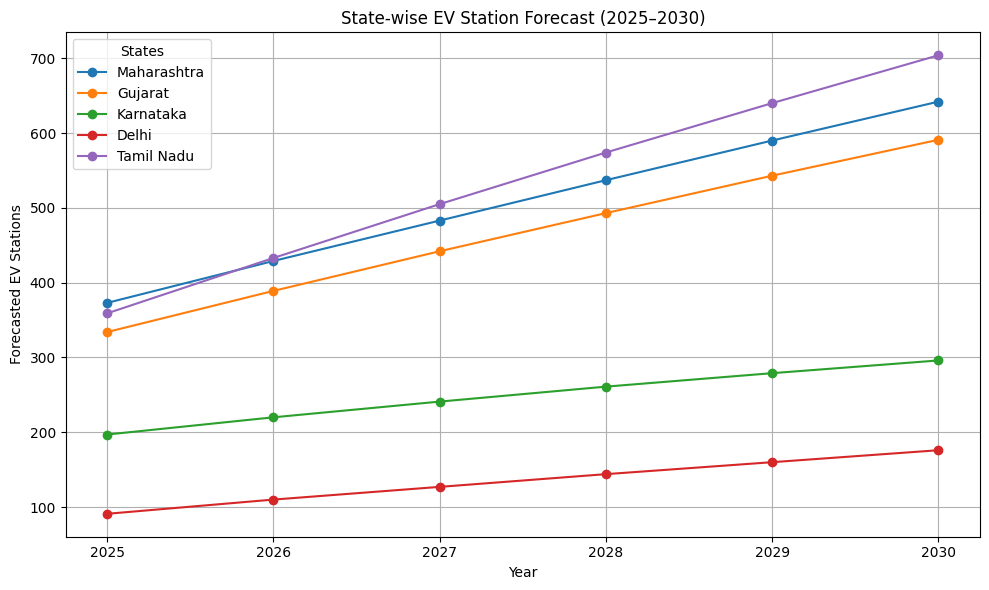

In [ ]:
#State wise fuel stations overall india
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load Dataset
df = pd.read_csv("/content/State_wise_Fuel_Stations.csv")

# Convert 'Year' to integer and set as index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
df.index = pd.DatetimeIndex(df.index).to_period('Y')

# Select Major States with High EV & CNG Growth
major_states = ["Maharashtra", "Gujarat", "Karnataka", "Delhi", "Tamil Nadu"]
df_major = df[df.index.year >= 2015]  # Filter recent data
df_major = df_major[df_major['State'].isin(major_states)].copy()

# Ensure no missing values in required columns
df_major = df_major.dropna(subset=['EV Stations', 'CNG Stations', 'Petrol/Diesel Stations'])

# Forecasting Function
def forecast_arima(df, state, column, order=(1,1,0)):
    state_data = df[df['State'] == state][[column]]

    # Ensure stationarity before fitting
    # if state_data[column].isnull().sum() > 0:
    #     return None  # Skip forecasting if too many NaNs

   # Ensure the column has enough non-null values
    if state_data[column].isnull().sum() > 0 or len(state_data) < 5:
        return None  # Skip forecasting if insufficient data

    # Fit ARIMA model
    model = ARIMA(state_data, order=order)
    fitted_model = model.fit()

    # Forecast 2025-2030
    forecast_years = pd.date_range(start='2025', periods=6, freq='YE')
    forecast = fitted_model.forecast(steps=6)

    return pd.Series(np.round(forecast.values).astype(int), index=forecast_years)

# Forecasting EV & CNG Stations for Major States
forecast_results = {}
for state in major_states:
    forecast_results[state] = {
        "EV_Stations": forecast_arima(df_major, state, "EV Stations"),
        "CNG_Stations": forecast_arima(df_major, state, "CNG Stations")
    }

# Print Forecast Results
for state, forecasts in forecast_results.items():
    # EV Stations Forecast
    if forecasts["EV_Stations"] is not None:
        df_ev_forecast = pd.DataFrame(forecasts["EV_Stations"]).reset_index()
        df_ev_forecast.columns = ["Year", "EV_Stations"]
        df_ev_forecast["Year"] = df_ev_forecast["Year"].dt.year  # Convert timestamp to plain year

        print(f"\n{state} EV Stations Forecast:")
        print(df_ev_forecast.to_string(index=False))  # Print without index for cleaner output

    # CNG Stations Forecast
    if forecasts["CNG_Stations"] is not None:
        df_cng_forecast = pd.DataFrame(forecasts["CNG_Stations"]).reset_index()
        df_cng_forecast.columns = ["Year", "CNG_Stations"]
        df_cng_forecast["Year"] = df_cng_forecast["Year"].dt.year  # Convert timestamp to plain year

        print(f"\n{state} CNG Stations Forecast:")
        print(df_cng_forecast.to_string(index=False))  # Print without index for cleaner output


# Infrastructure Coverage Summary
infrastructure_summary = df_major.groupby("State")[['EV Stations', 'CNG Stations']].sum()
infrastructure_summary['Total Stations'] = infrastructure_summary.sum(axis=1)
print("\nInfrastructure Coverage:")
print(infrastructure_summary)

# Growth Patterns Analysis
df_major['EV Growth(%)'] = df_major.groupby('State')['EV Stations'].pct_change().fillna(0) * 100
df_major['CNG Growth(%)'] = df_major.groupby('State')['CNG Stations'].pct_change().fillna(0) * 100
print("\nGrowth Patterns:")
print(df_major[['State', 'EV Growth(%)', 'CNG Growth(%)']])

# State-wise EV Station Growth Ranking
ev_rank = infrastructure_summary[['EV Stations']].sort_values(by='EV Stations', ascending=False)
ev_rank['EV_Rank'] = range(1, len(ev_rank) + 1)
print("\nState Comparison:")
print(ev_rank)

# Visualization - Compare EV Station Forecasts Across Major States
plt.figure(figsize=(10, 6))

for state in major_states:
    ev_forecast = forecast_results[state]["EV_Stations"]
    if ev_forecast is not None:
        years = ev_forecast.index.year
        plt.plot(years, ev_forecast, marker='o', linestyle='-', label=state)

plt.xlabel('Year')
plt.ylabel('Forecasted EV Stations')
plt.title('State-wise EV Station Forecast (2025–2030)')
plt.legend(title="States")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
import warnings
warnings.filterwarnings("ignore")

Data successfully filtered!

📌 Processing MAHARASHTRA...

🔹 CNG Sales Forecast for MAHARASHTRA:
   2025.0: 97116 units
   2026.0: 113808 units
   2027.0: 130500 units
   2028.0: 147192 units
   2029.0: 163884 units
   2030.0: 180576 units


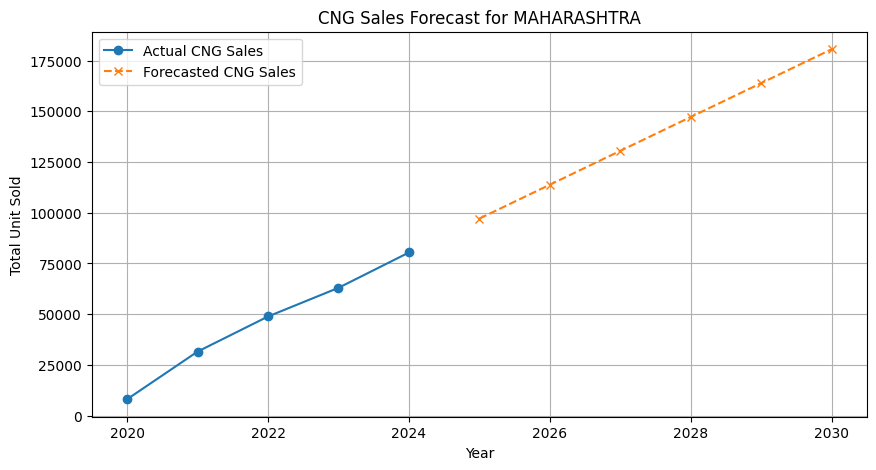


🔹 DIESEL Sales Forecast for MAHARASHTRA:
   2025.0: 343400 units
   2026.0: 364710 units
   2027.0: 386021 units
   2028.0: 407332 units
   2029.0: 428642 units
   2030.0: 449953 units


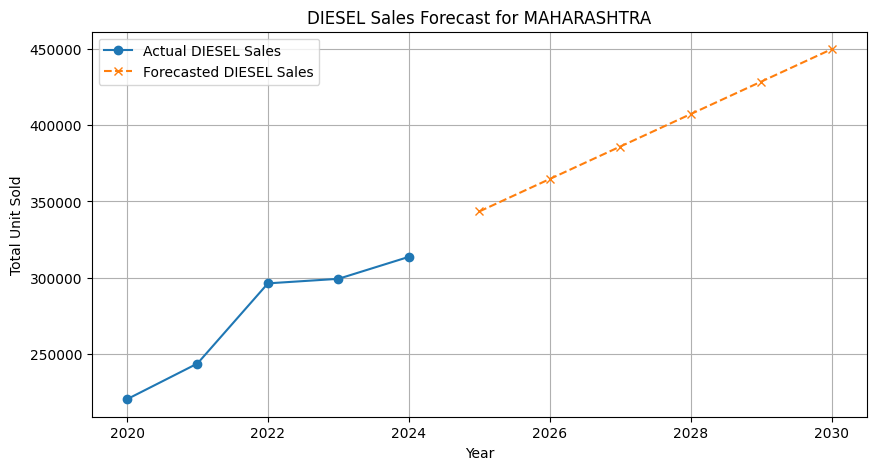


🔹 EV Sales Forecast for MAHARASHTRA:
   2025.0: 178188 units
   2026.0: 200974 units
   2027.0: 223759 units
   2028.0: 246544 units
   2029.0: 269330 units
   2030.0: 292115 units


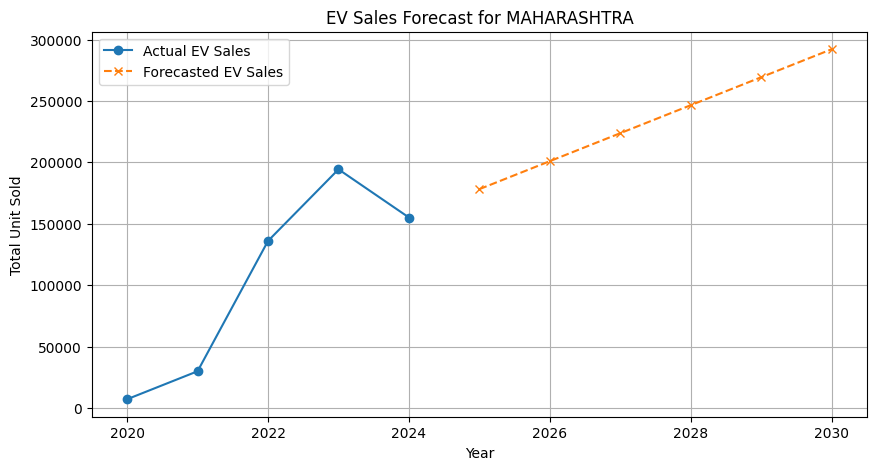


🔹 PETROL Sales Forecast for MAHARASHTRA:
   2025.0: 2063320 units
   2026.0: 2180331 units
   2027.0: 2297341 units
   2028.0: 2414351 units
   2029.0: 2531362 units
   2030.0: 2648372 units


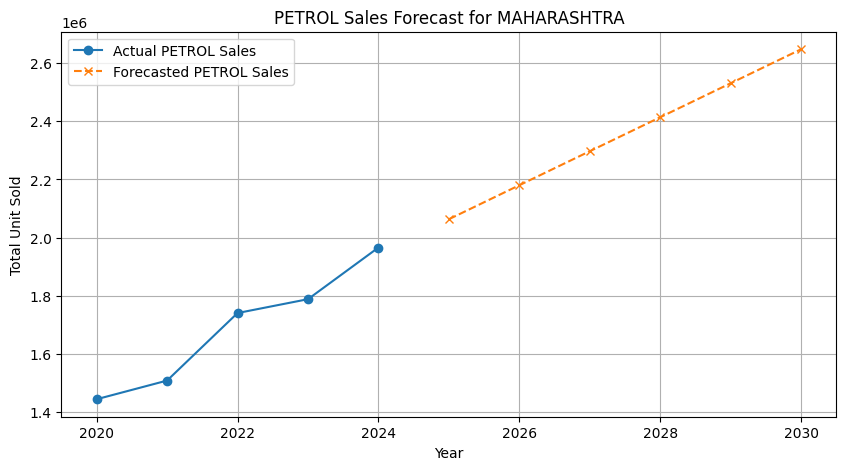


📌 Processing DELHI...

🔹 CNG Sales Forecast for DELHI:
   2025.0: 27344 units
   2026.0: 26365 units
   2027.0: 25386 units
   2028.0: 24408 units
   2029.0: 23429 units
   2030.0: 22450 units


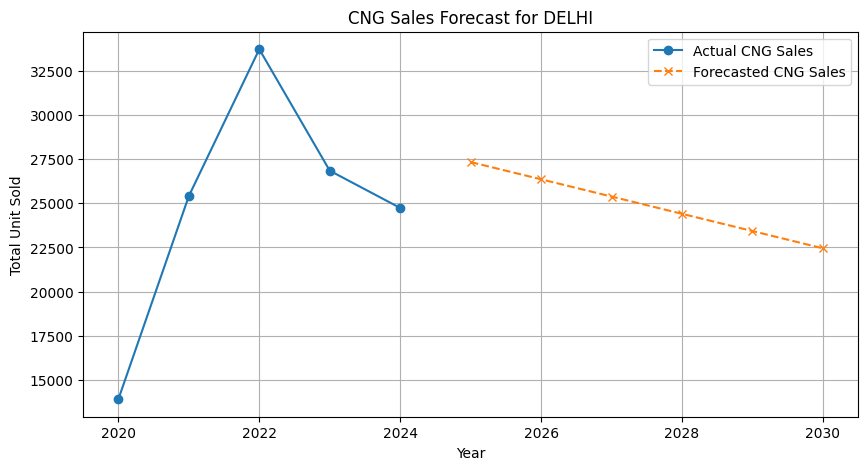


🔹 DIESEL Sales Forecast for DELHI:
   2025.0: 13431 units
   2026.0: 13386 units
   2027.0: 13341 units
   2028.0: 13295 units
   2029.0: 13250 units
   2030.0: 13205 units


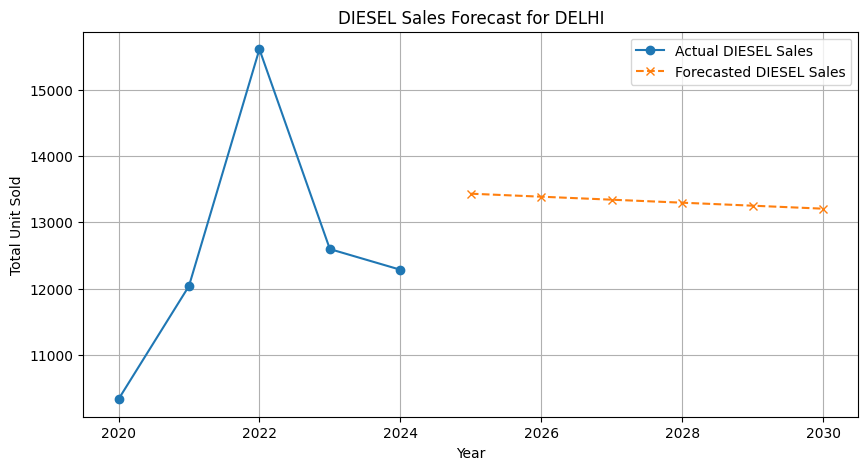


🔹 EV Sales Forecast for DELHI:
   2025.0: 92873 units
   2026.0: 106306 units
   2027.0: 119740 units
   2028.0: 133173 units
   2029.0: 146607 units
   2030.0: 160040 units


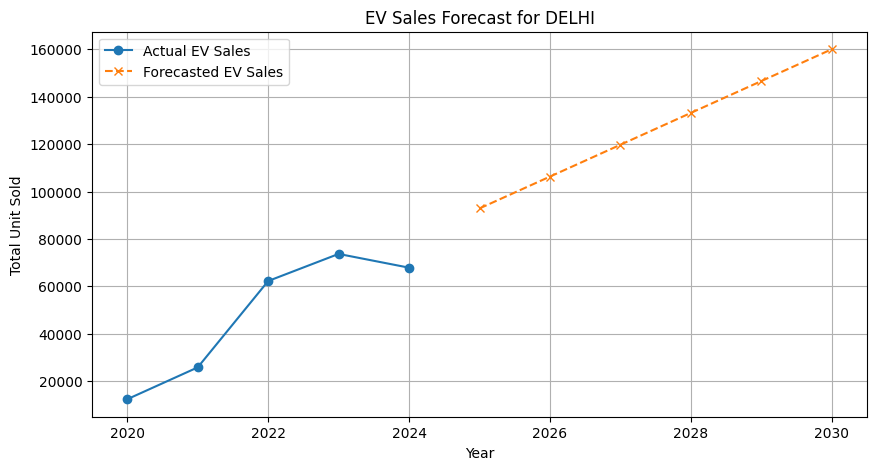


🔹 PETROL Sales Forecast for DELHI:
   2025.0: 549002 units
   2026.0: 584658 units
   2027.0: 620314 units
   2028.0: 655970 units
   2029.0: 691626 units
   2030.0: 727282 units


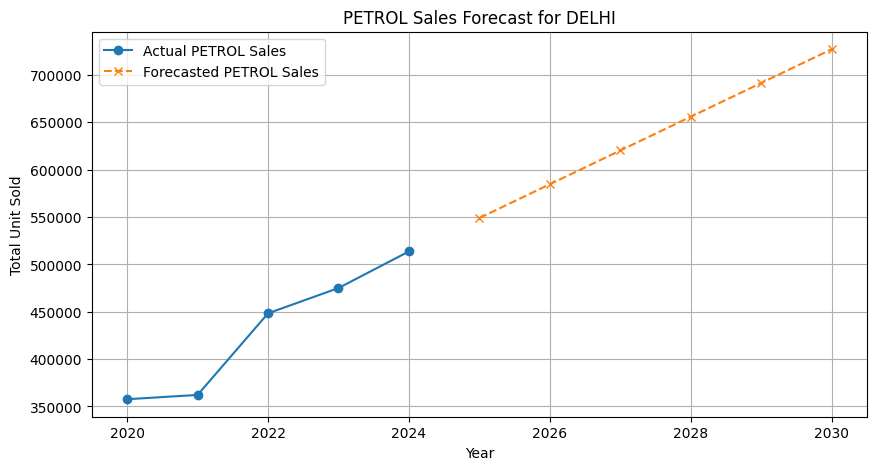

In [ ]:
#Maharastra & Delhi Forcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset
file_path = "State_Wise_Fuel_Sales_&_Decline_Dataset.csv"
df = pd.read_csv(file_path)

#  Fix 1: Normalize State Names
df['State'] = df['State'].astype(str).str.strip().str.upper()

#  Fix 2: Normalize Fuel Type Names
df['Fuel Type'] = df['Fuel Type'].astype(str).str.strip().str.upper()

#  Fix 3: Remove Unnamed Columns (if any)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#  Fix 4: Ensure 'Total Unit Sold' is Numeric
df['Total Unit Sold'] = pd.to_numeric(df['Total Unit Sold'], errors='coerce')

# Filter for Maharashtra & Delhi
target_states = ["MAHARASHTRA", "DELHI"]
df_filtered = df[df["State"].isin(target_states)]

#  Fix 5: Check if Data Exists
if df_filtered.empty:
    print("Error: No data found for Maharashtra or Delhi after cleaning!")
    print("Available states:", df["State"].unique())
    print("Available fuel types:", df["Fuel Type"].unique())
else:
    print("Data successfully filtered!")

# Forecasting Function
def forecast_fuel_sales(state, fuel_type):
    data = df_filtered[(df_filtered["State"] == state) & (df_filtered["Fuel Type"] == fuel_type)]

    if data.empty:
        print(f"Skipping {fuel_type} for {state}, no data available.")
        return

    # Sort data by Year
    data = data.sort_values(by="Year")

    # Fit Exponential Smoothing Model
    model = ExponentialSmoothing(
        data["Total Unit Sold"], trend="add", seasonal=None, seasonal_periods=None
    ).fit()

    # Predict future sales till 2030
    future_years = np.arange(data["Year"].max() + 1, 2031)
    forecast = model.forecast(len(future_years))

    # 🔹 Print forecasted values as text output
    print(f"\n🔹 {fuel_type} Sales Forecast for {state}:")
    for year, value in zip(future_years, forecast):
        print(f"   {year}: {int(value)} units")

    # 📊 Plot the chart
    plt.figure(figsize=(10, 5))
    plt.plot(data["Year"], data["Total Unit Sold"], marker="o", label=f"Actual {fuel_type} Sales")
    plt.plot(future_years, forecast, marker="x", linestyle="--", label=f"Forecasted {fuel_type} Sales")
    plt.title(f"{fuel_type} Sales Forecast for {state}")
    plt.xlabel("Year")
    plt.ylabel("Total Unit Sold")
    plt.legend()
    plt.grid()
    plt.show()

# Run forecast for all fuel types in Maharashtra & Delhi
fuel_types = ["CNG", "DIESEL", "EV", "PETROL"]

for state in target_states:
    print(f"\n📌 Processing {state}...")
    for fuel in fuel_types:
        forecast_fuel_sales(state, fuel)


In [ ]:
#10 states for forecast
import pandas as pd

# Load dataset
file_path = "State_Wise_Fuel_Sales_&_Decline_Dataset.csv"
df = pd.read_csv(file_path)

# Normalize State Names
df['State'] = df['State'].astype(str).str.strip().str.upper()

# Convert 'Total Unit Sold' to numeric (handle errors)
df['Total Unit Sold'] = pd.to_numeric(df['Total Unit Sold'], errors='coerce')

# Aggregate total sales by state
state_sales = df.groupby("State")["Total Unit Sold"].sum().reset_index()

# Get the top 10 states with highest total sales
top_10_states = state_sales.nlargest(10, "Total Unit Sold")
top_10_states


State  Total Unit Sold
32   UTTAR PRADESH       15069357.0
19     MAHARASHTRA       10573071.0
14       KARNATAKA        8323029.0
30      TAMIL NADU        8065825.0
9           GUJRAT        7094407.0
18  MADHYA PRADESH        6739002.0
28        RAJSHTAN        6408533.0
4            BIHAR        5706119.0
0   ANDHRA PRADESH        4425884.0
34     WEST BENGAL        3969552.0

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Data successfully filtered for top 10 states: ['UTTAR PRADESH', 'MAHARASHTRA', 'KARNATAKA', 'TAMIL NADU', 'GUJRAT', 'MADHYA PRADESH', 'RAJSHTAN', 'BIHAR', 'ANDHRA PRADESH', 'WEST BENGAL']

📌 Processing UTTAR PRADESH...

🔹 CNG Sales Forecast for UTTAR PRADESH:
   2025: 72420 units
   2026: 80998 units
   2027: 89577 units
   2028: 98155 units
   2029: 106734 units
   2030: 115312 units
   2031: 123891 units

🔹 DIESEL Sales Forecast for UTTAR PRADESH:
   2025: 321615 units
   2026: 338907 units
   2027: 356199 units
   2028: 373491 units
   2029: 390783 units
   2030: 408075 units
   2031: 425367 units

🔹 EV Sales Forecast for UTTAR PRADESH:
   2025: 338203 units
   2026: 373653 units
   2027: 409102 units
   2028: 444552 units
   2029: 480001 units
   2030: 515451 units
   2031: 550900 units

🔹 PETROL Sales Forecast for UTTAR PRADESH:
   2025: 2957788 units
   2026: 3065858 units
   2027: 3173927 units
   2028: 3281997 units
   2029: 3390066 units
   2030: 3498136 units
   2031: 3606205

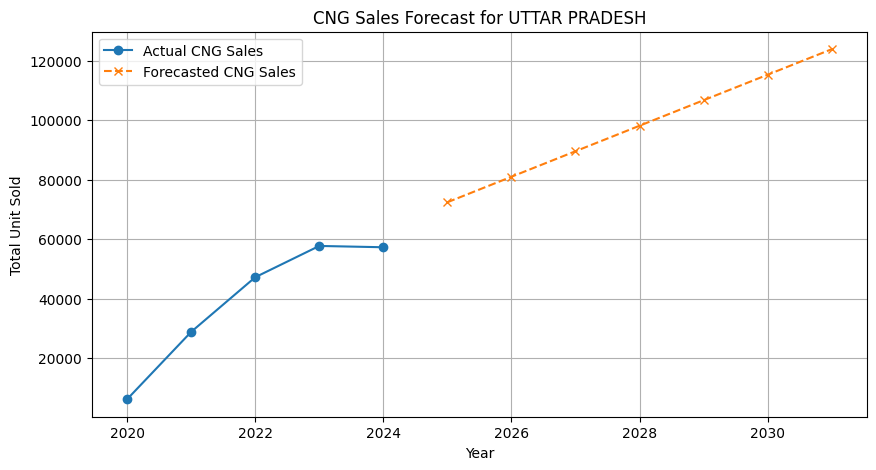

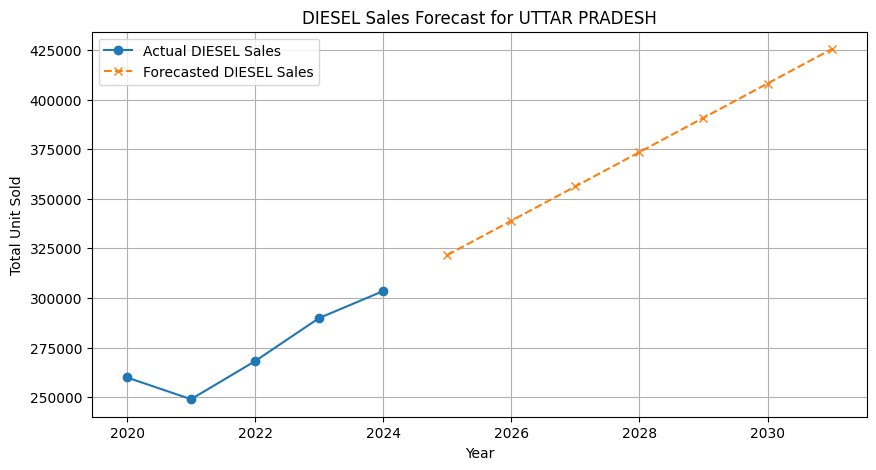

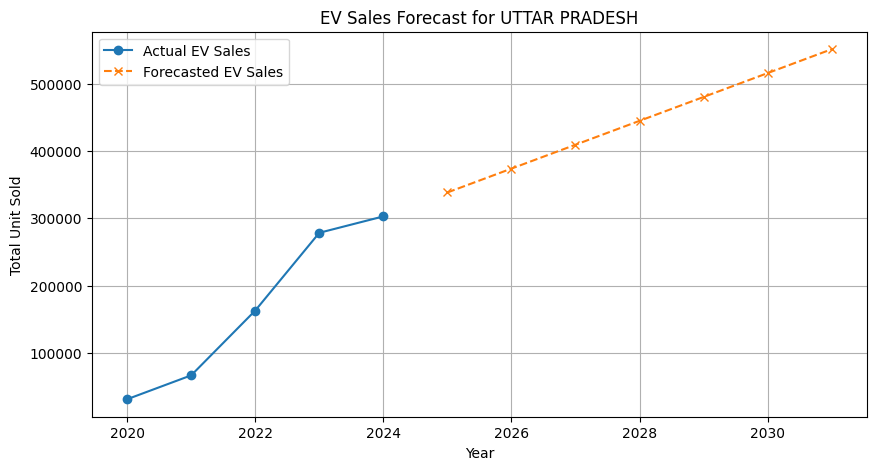

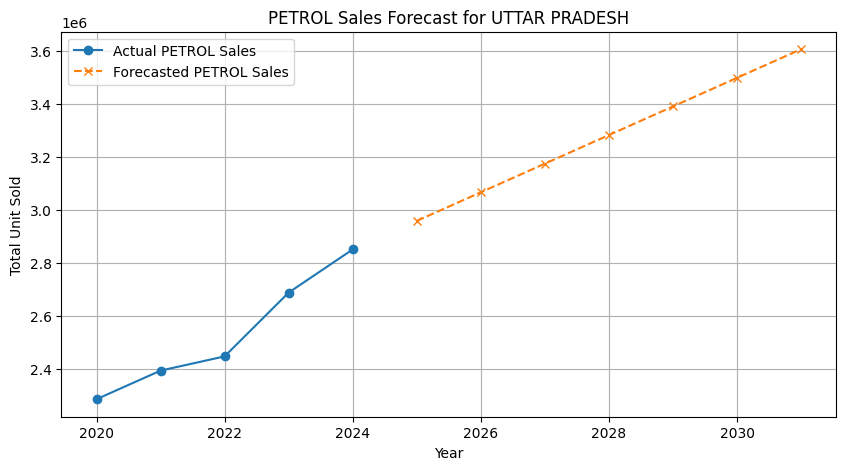

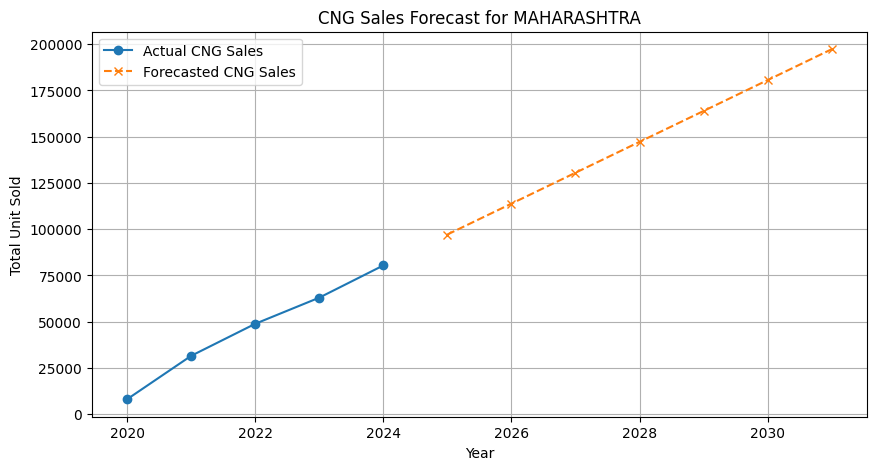

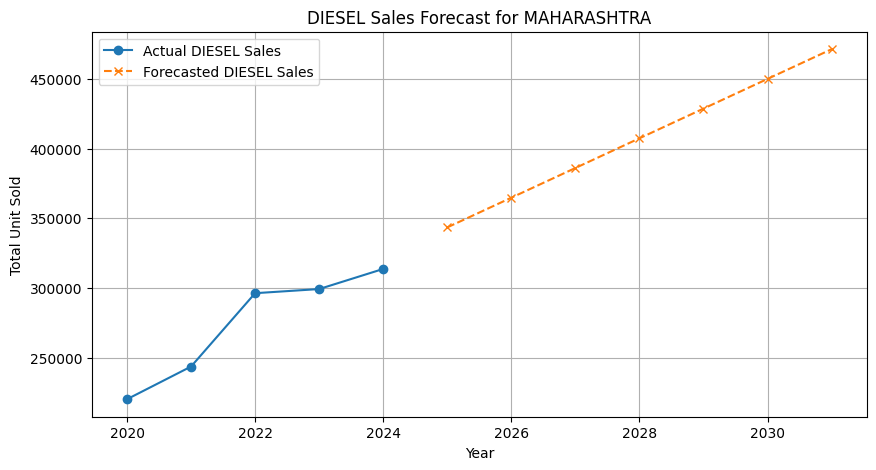

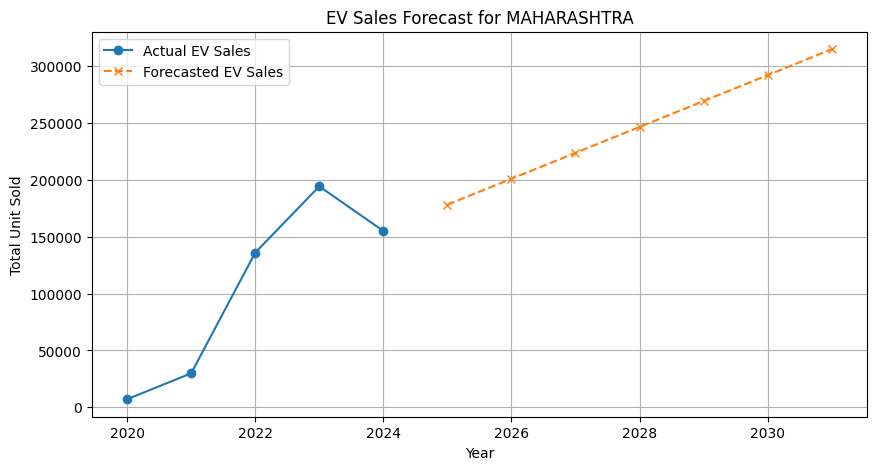

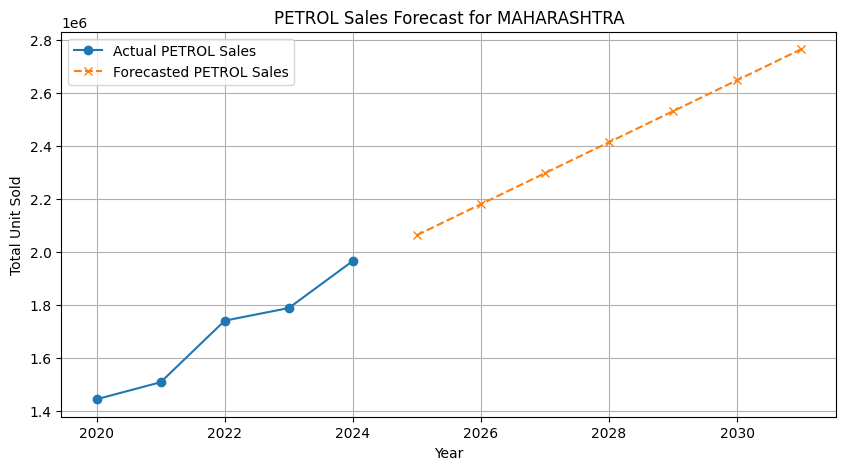

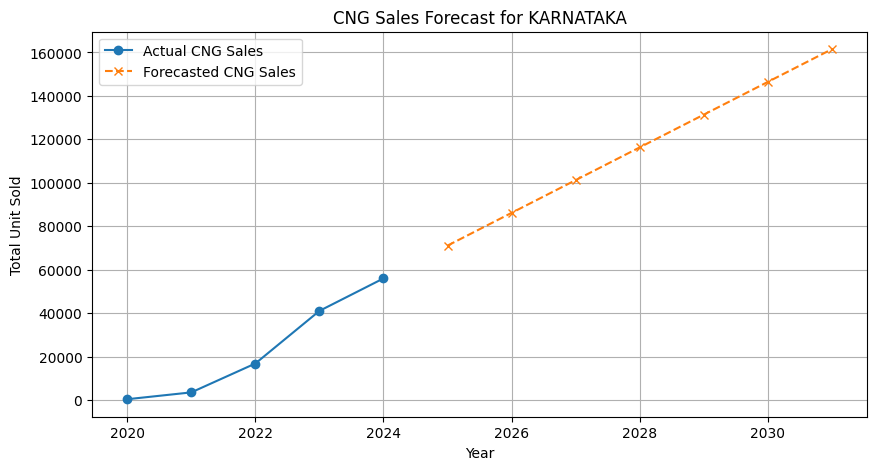

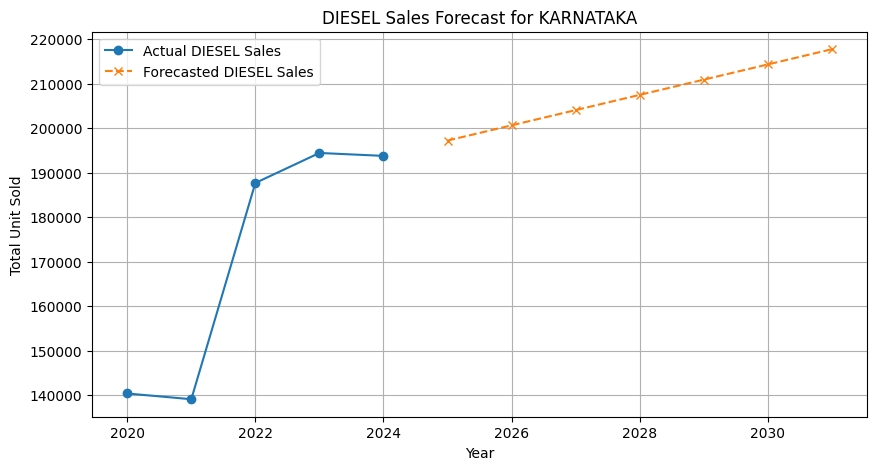

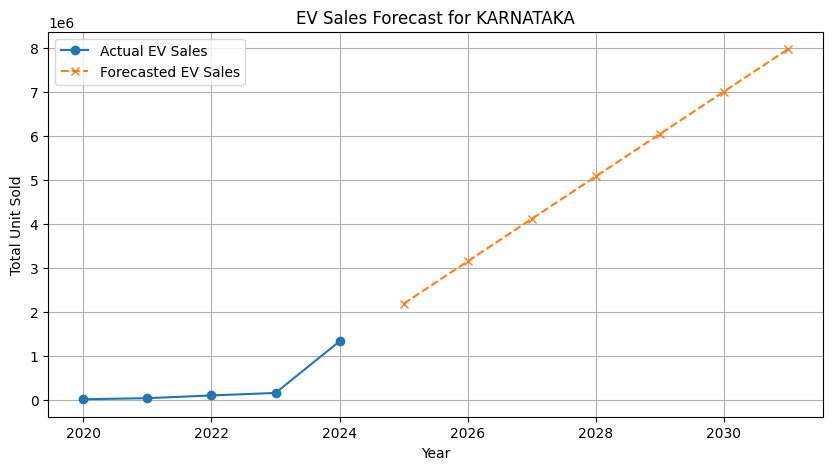

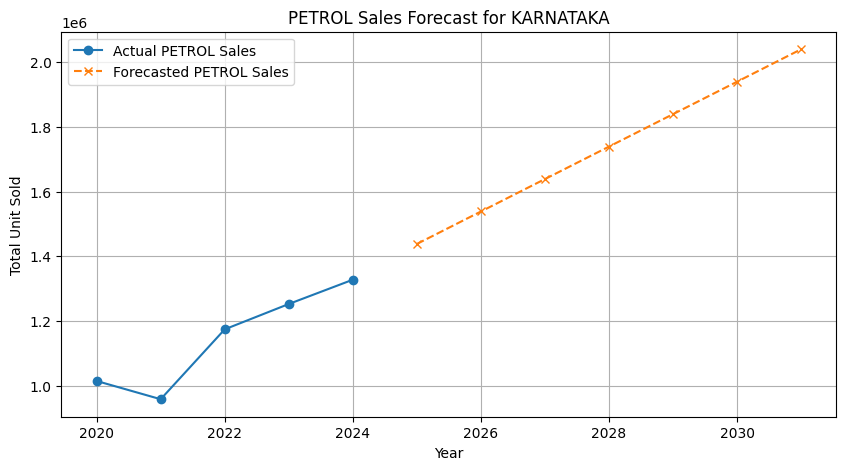

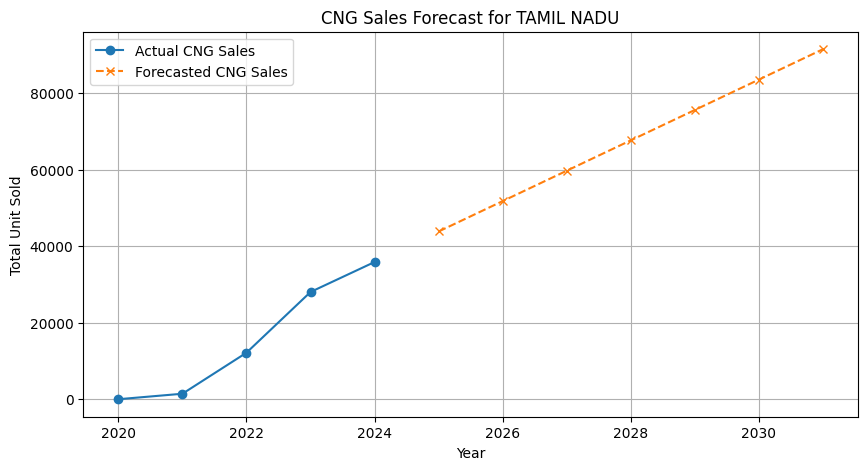

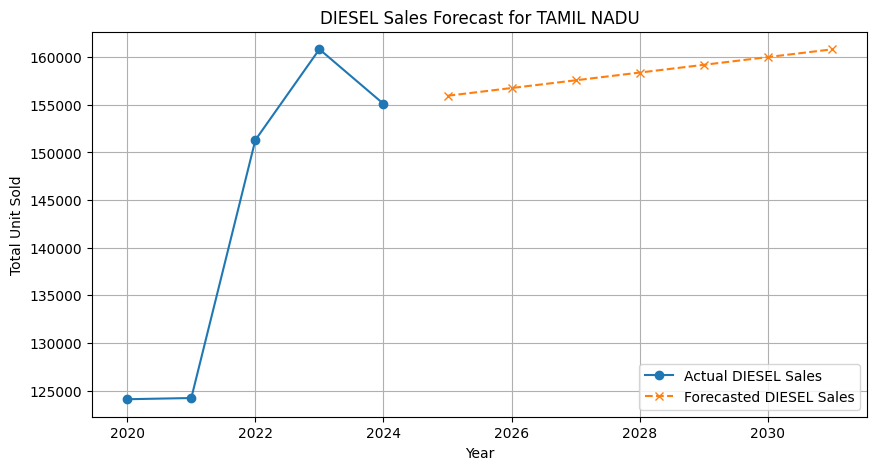

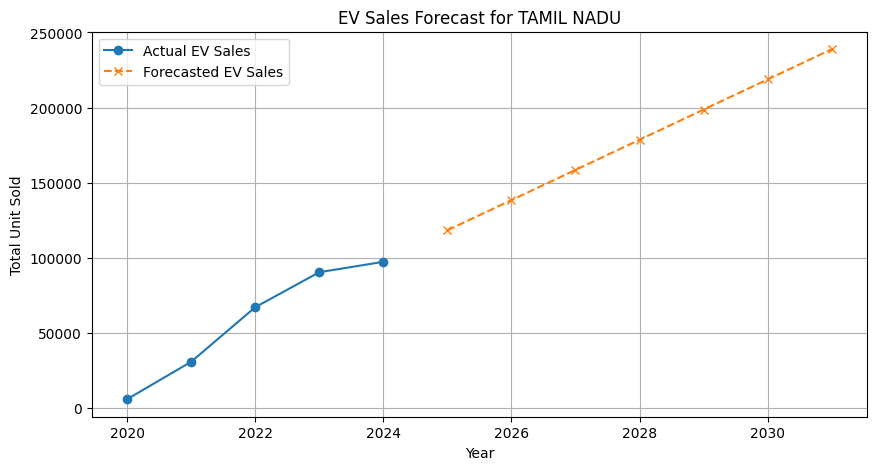

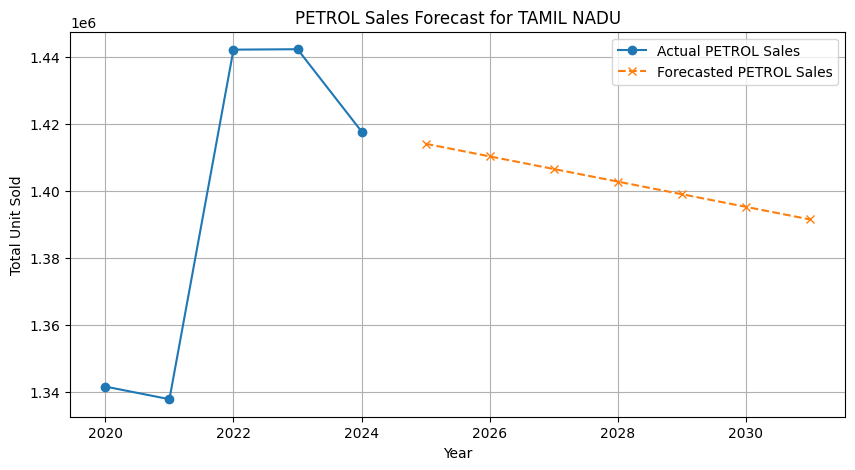

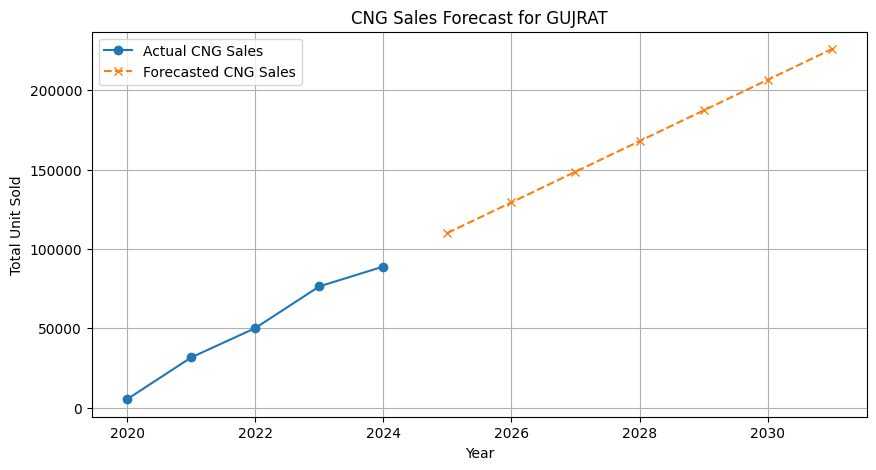

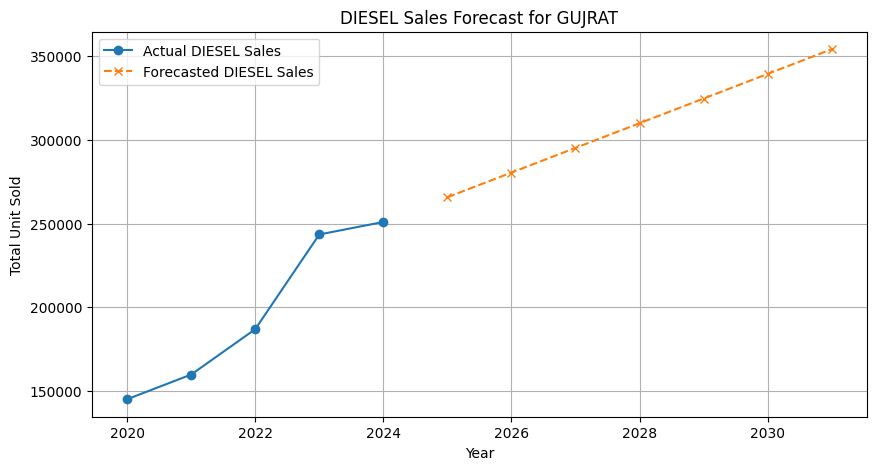

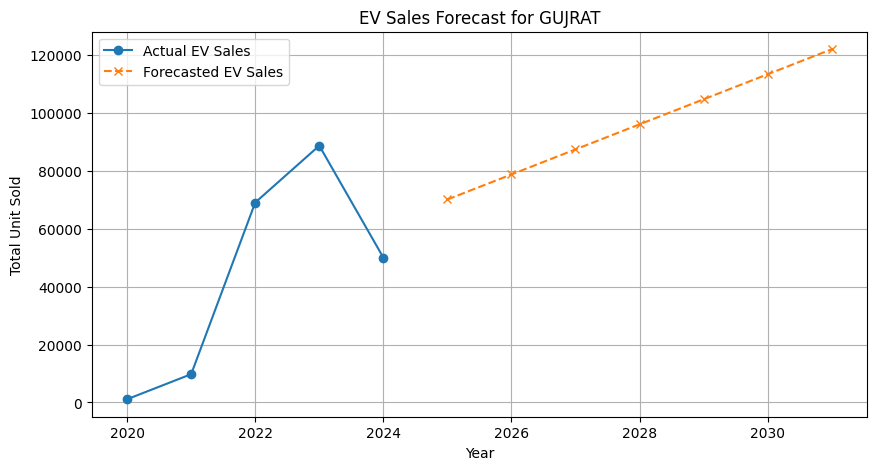

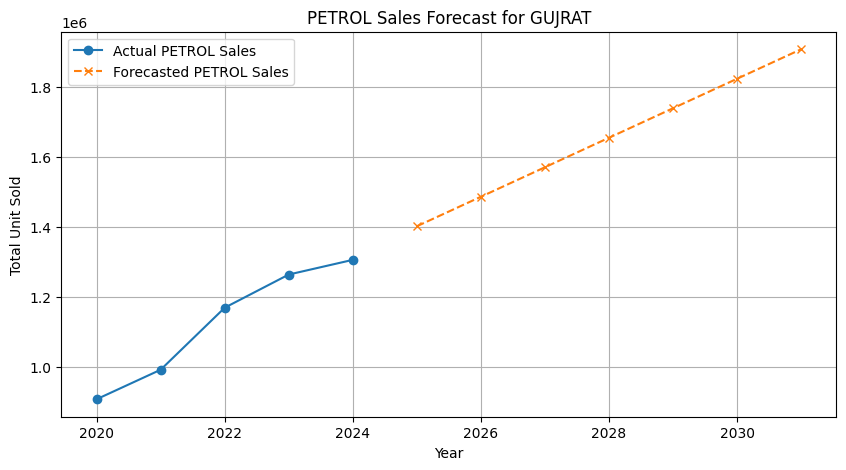

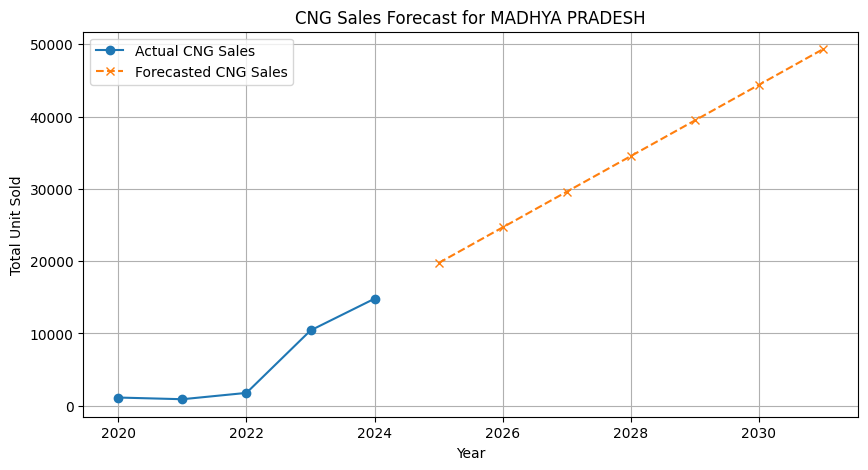

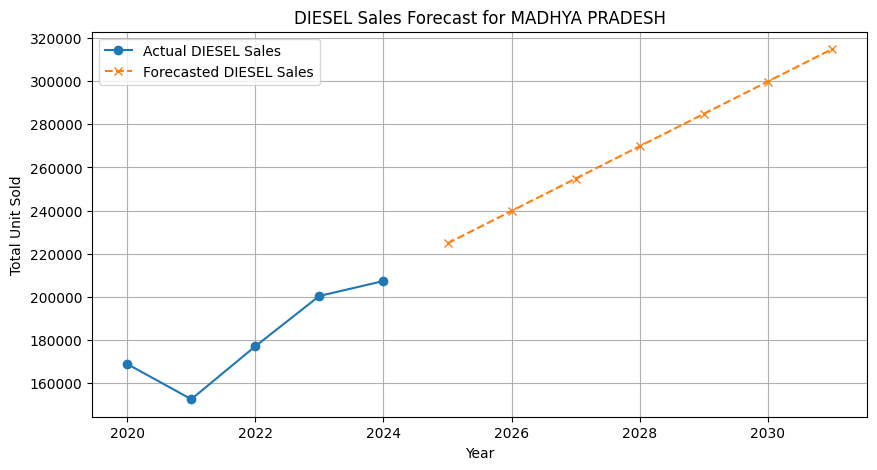

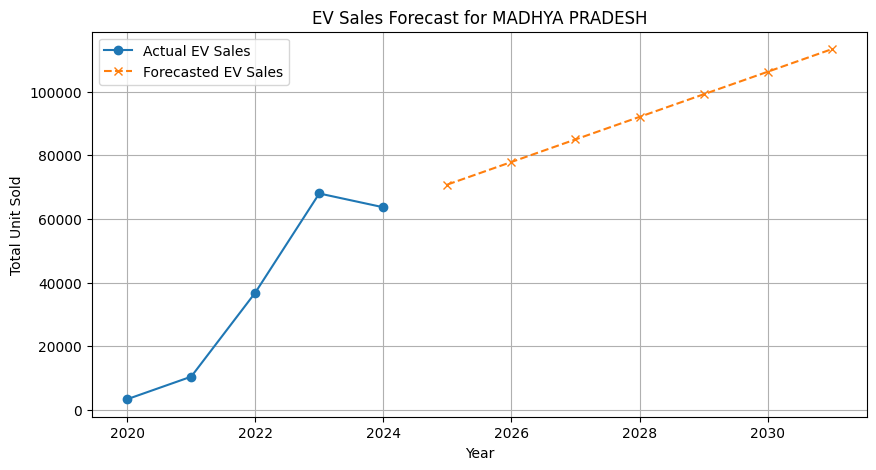

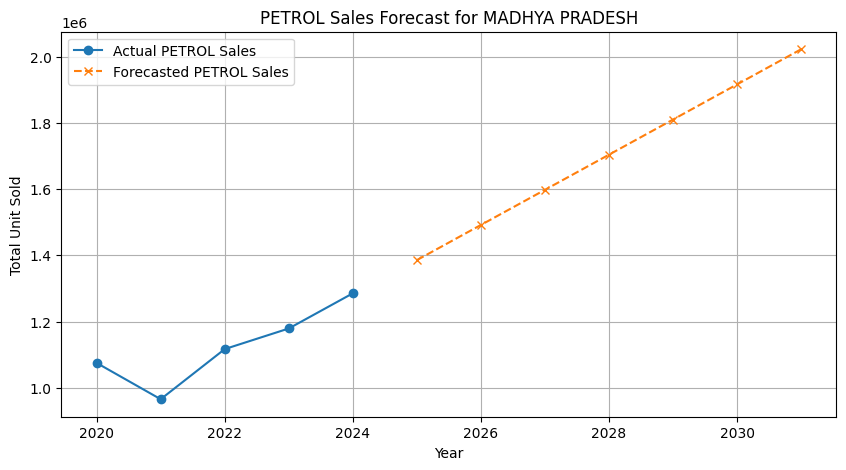

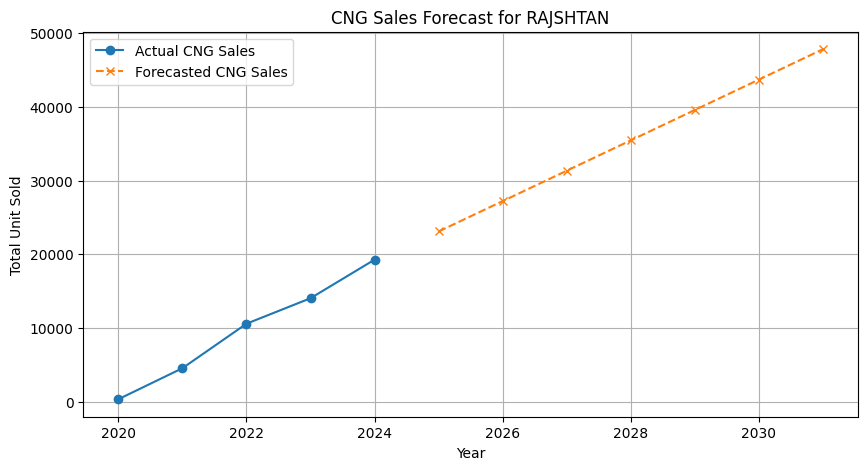

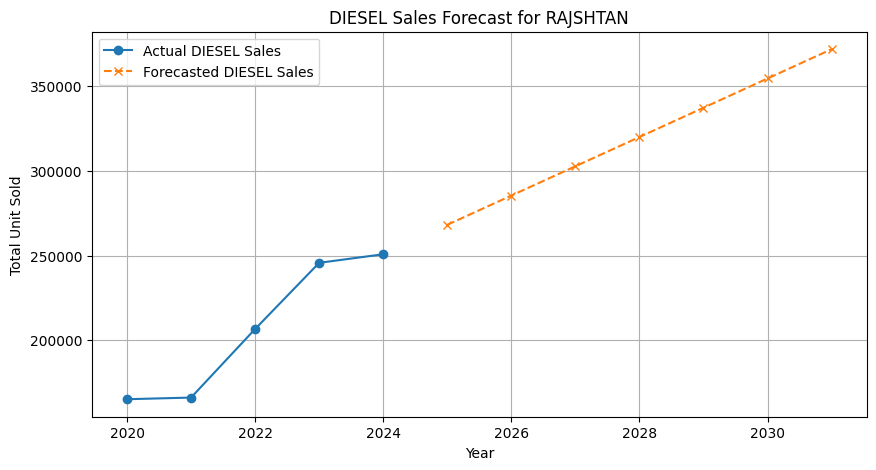

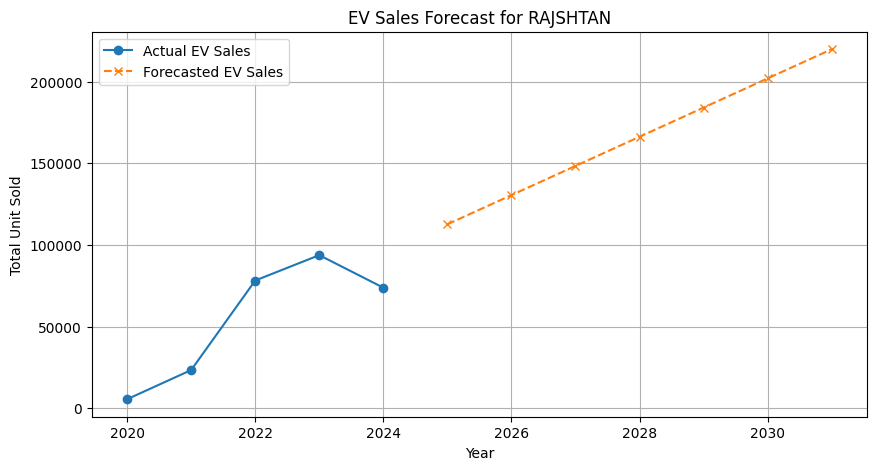

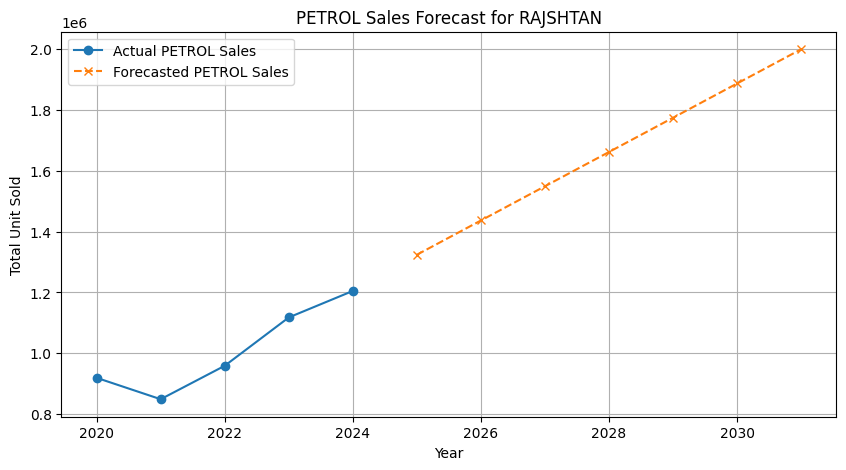

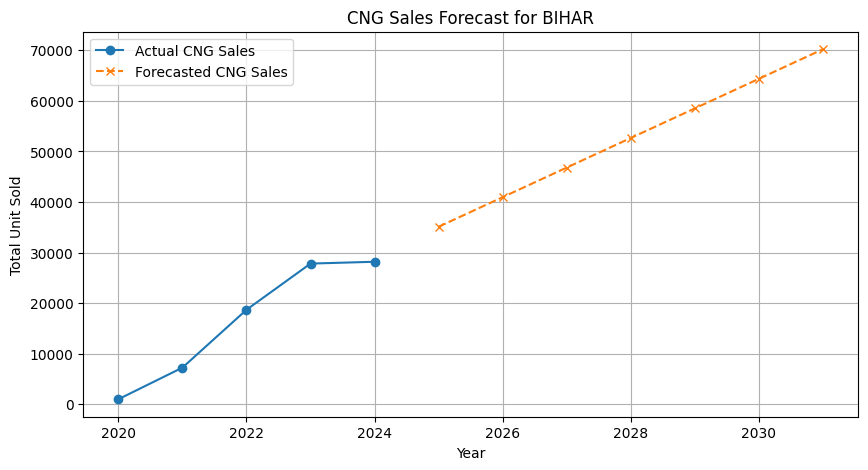

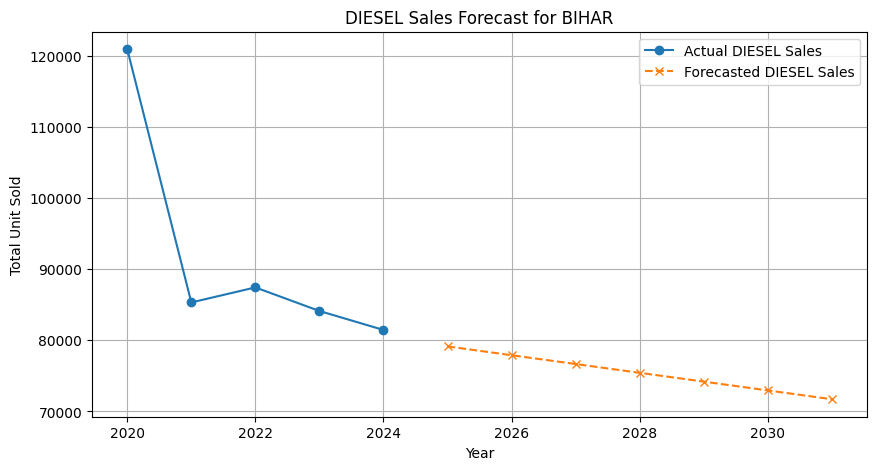

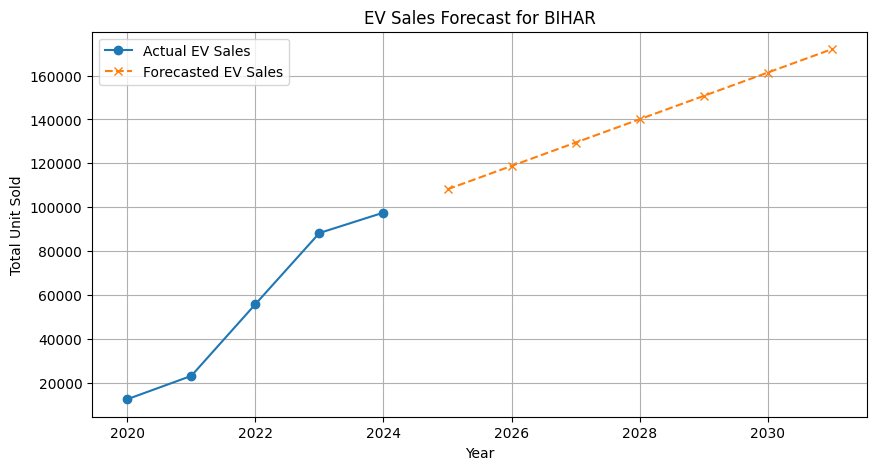

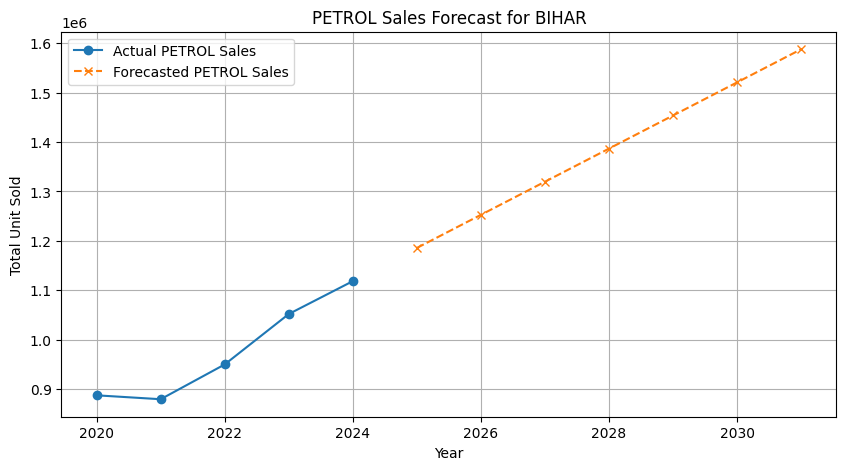

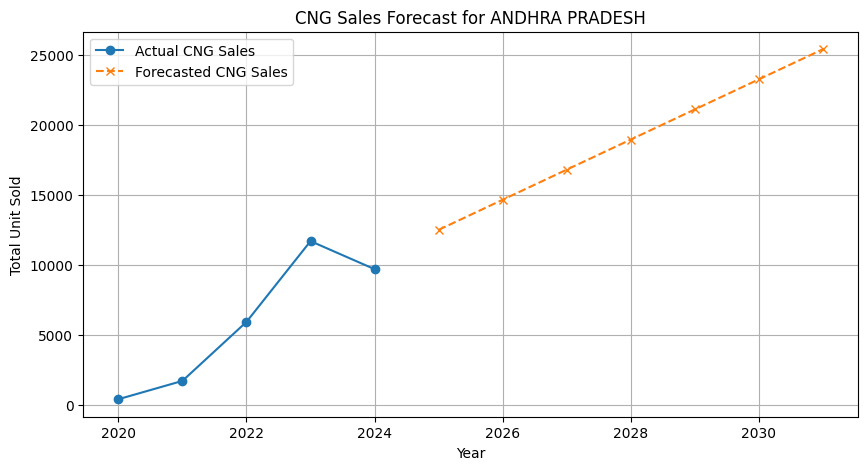

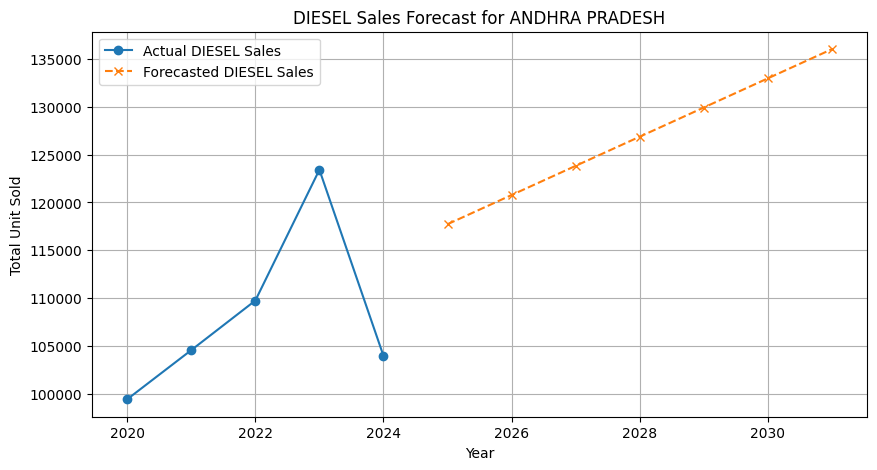

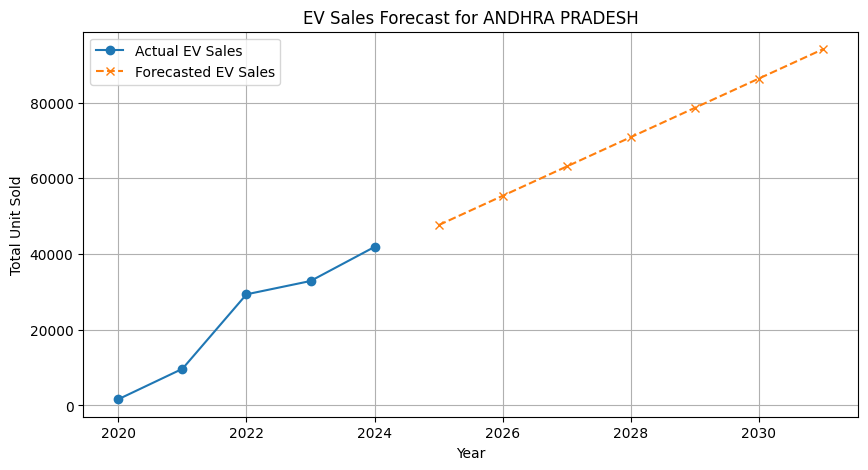

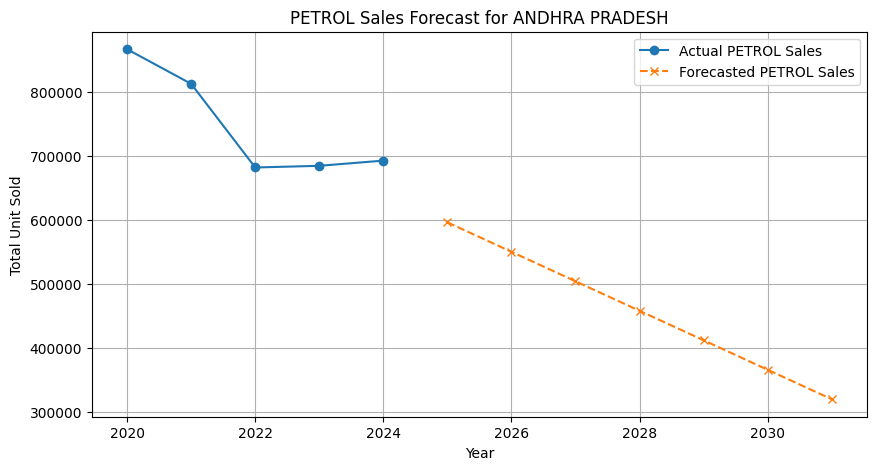

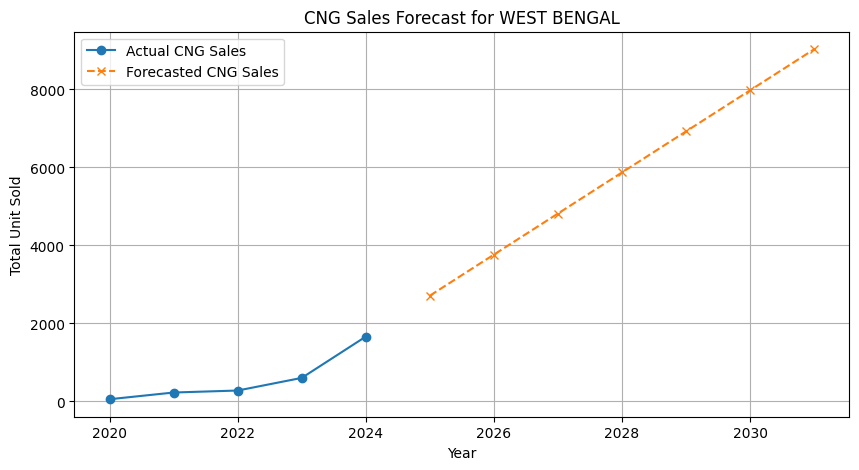

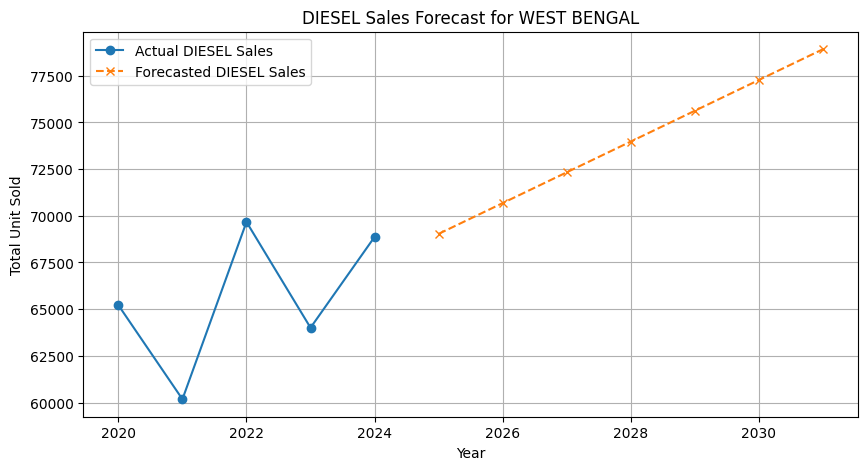

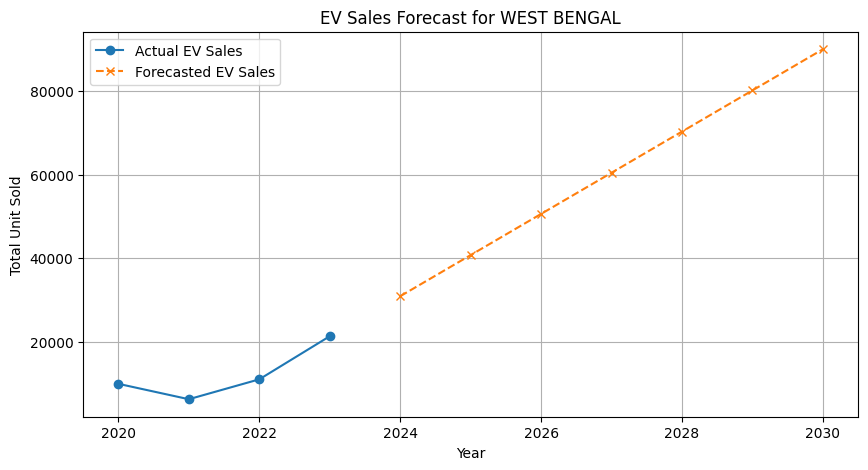

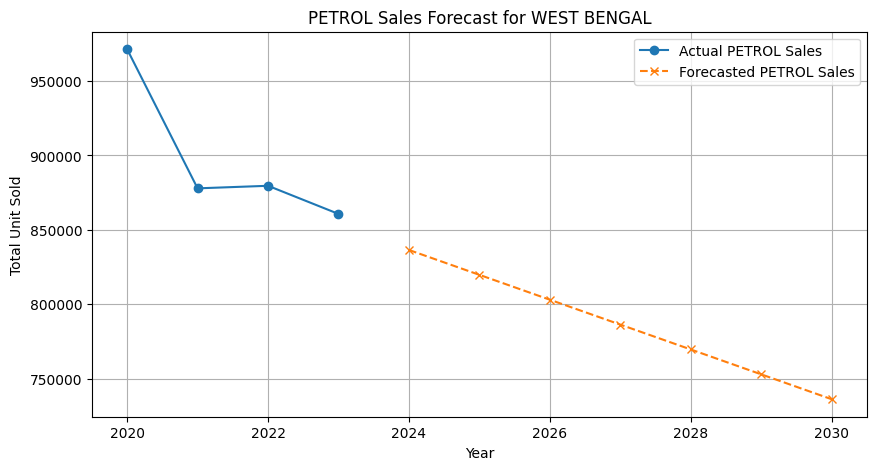

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset
file_path = "State_Wise_Fuel_Sales_&_Decline_Dataset.csv"
df = pd.read_csv(file_path)

# 🔧 Fix 1: Normalize State & Fuel Type Names
df['State'] = df['State'].astype(str).str.strip().str.upper()
df['Fuel Type'] = df['Fuel Type'].astype(str).str.strip().str.upper()

# 🔧 Fix 2: Remove Unnamed Columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 🔧 Fix 3: Ensure 'Year' and 'Total Unit Sold' are Numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Total Unit Sold'] = pd.to_numeric(df['Total Unit Sold'], errors='coerce')

# 🔧 Fix 4: Convert "Year" to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# 🔧 Fix 5: Aggregate Total Sales by State
state_sales = df.groupby("State")["Total Unit Sold"].sum().reset_index()

# Select the **Top 10 States** with the highest total sales
top_10_states = state_sales.nlargest(10, "Total Unit Sold")["State"].tolist()

# Filter dataset for top 10 states
df_filtered = df[df["State"].isin(top_10_states)]

# 🔧 Fix 6: Check if Data Exists
if df_filtered.empty:
    print("Error: No data found for top 10 states after cleaning!")
    print("Available states:", df["State"].unique())
    print("Available fuel types:", df["Fuel Type"].unique())
else:
    print(f"Data successfully filtered for top 10 states: {top_10_states}")

# 📌 **Forecasting Function**
def forecast_fuel_sales(state, fuel_type):
    data = df_filtered[(df_filtered["State"] == state) & (df_filtered["Fuel Type"] == fuel_type)]

    if data.empty:
        print(f"⚠️ Skipping {fuel_type} for {state}, no data available.")
        return None, None

    # Sort data by Year
    data = data.sort_values(by="Year")

    # 🔧 Fix: Set "Year" as the index and ensure it's in datetime format
    data = data.set_index("Year")

    # 🔍 **Ensure Sufficient Data Points**
    if len(data) < 3:
        print(f"⚠️ Skipping {fuel_type} for {state}, insufficient data (less than 3 years).")
        return None, None

    # Fit Exponential Smoothing Model
    model = ExponentialSmoothing(
        data["Total Unit Sold"], trend="add", seasonal=None, seasonal_periods=None
    ).fit(optimized=True)

    # Predict future sales till 2030
    future_years = pd.date_range(start=data.index.max() + pd.DateOffset(years=1), periods=7, freq='YE')
    forecast = model.forecast(len(future_years))

    # Print forecasted values
    print(f"\n🔹 {fuel_type} Sales Forecast for {state}:")
    for year, value in zip(future_years, forecast):
        print(f"   {year.year}: {int(value)} units")

    return future_years, forecast

# Store all forecasts for chart plotting
forecasts = {}

# Step 1: Print all predictions as text first
fuel_types = ["CNG", "DIESEL", "EV", "PETROL"]

for state in top_10_states:
    print(f"\n📌 Processing {state}...")
    forecasts[state] = {}
    for fuel in fuel_types:
        years, sales = forecast_fuel_sales(state, fuel)
        if years is not None:
            forecasts[state][fuel] = (years, sales)

# Step 2: Generate charts after all text output
for state, fuel_data in forecasts.items():
    for fuel, (years, sales) in fuel_data.items():
        data = df_filtered[(df_filtered["State"] == state) & (df_filtered["Fuel Type"] == fuel)]

        # Skip plotting if no valid forecast
        if years is None:
            continue

        plt.figure(figsize=(10, 5))
        plt.plot(data["Year"].dt.year, data["Total Unit Sold"], marker="o", label=f"Actual {fuel} Sales")
        plt.plot(years.year, sales, marker="x", linestyle="--", label=f"Forecasted {fuel} Sales")
        plt.title(f"{fuel} Sales Forecast for {state}")
        plt.xlabel("Year")
        plt.ylabel("Total Unit Sold")
        plt.legend()
        plt.grid()
        plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")

Data successfully filtered for top 10 states: ['MAHARASHTRA', 'DELHI', 'KARNATAKA', 'TAMIL NADU', 'GUJRAT', 'UTTAR PRADESH', 'RAJSHTAN', 'MADHYA PRADESH', 'WEST BENGAL', 'PUNJAB']

📌 Processing MAHARASHTRA...

🔹 CNG Sales Forecast for MAHARASHTRA:
   2025.0: 97116 units
   2026.0: 113808 units
   2027.0: 130500 units
   2028.0: 147192 units
   2029.0: 163884 units
   2030.0: 180576 units

🔹 DIESEL Sales Forecast for MAHARASHTRA:
   2025.0: 343400 units
   2026.0: 364710 units
   2027.0: 386021 units
   2028.0: 407332 units
   2029.0: 428642 units
   2030.0: 449953 units

🔹 EV Sales Forecast for MAHARASHTRA:
   2025.0: 178188 units
   2026.0: 200974 units
   2027.0: 223759 units
   2028.0: 246544 units
   2029.0: 269330 units
   2030.0: 292115 units

🔹 PETROL Sales Forecast for MAHARASHTRA:
   2025.0: 2063320 units
   2026.0: 2180331 units
   2027.0: 2297341 units
   2028.0: 2414351 units
   2029.0: 2531362 units
   2030.0: 2648372 units

📌 Processing DELHI...

🔹 CNG Sales Forecast for 

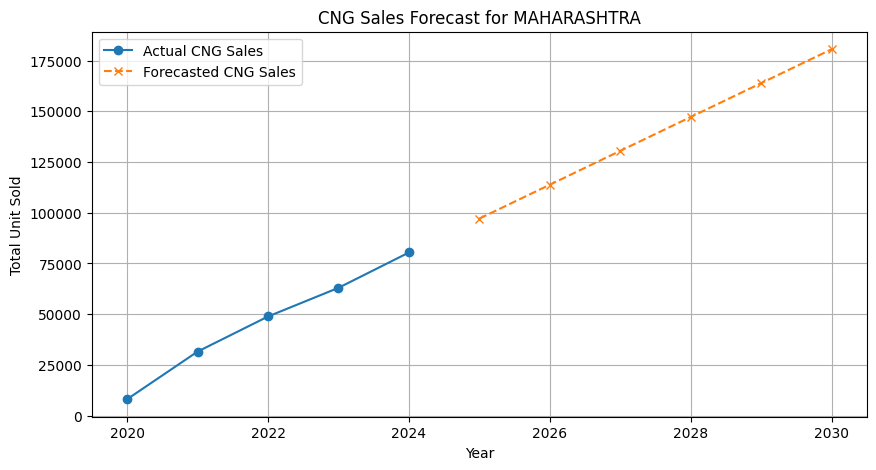

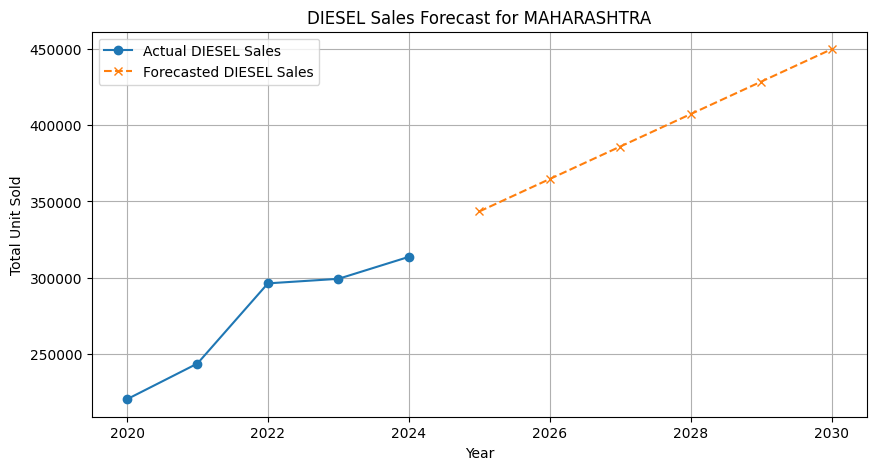

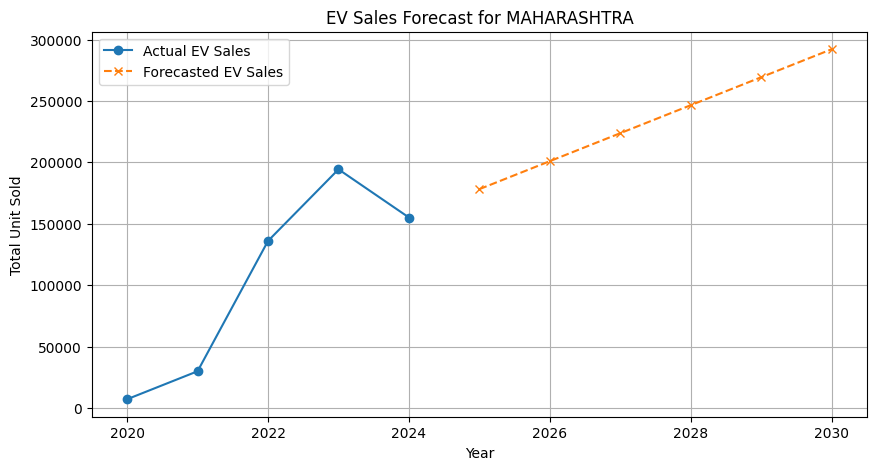

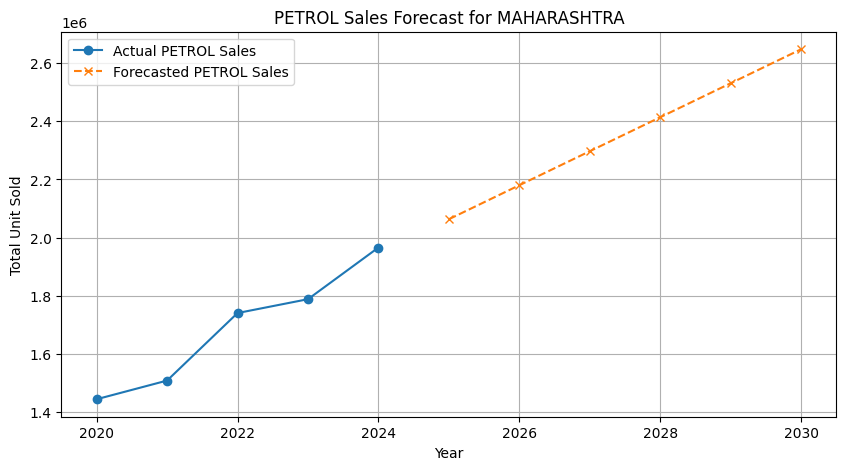

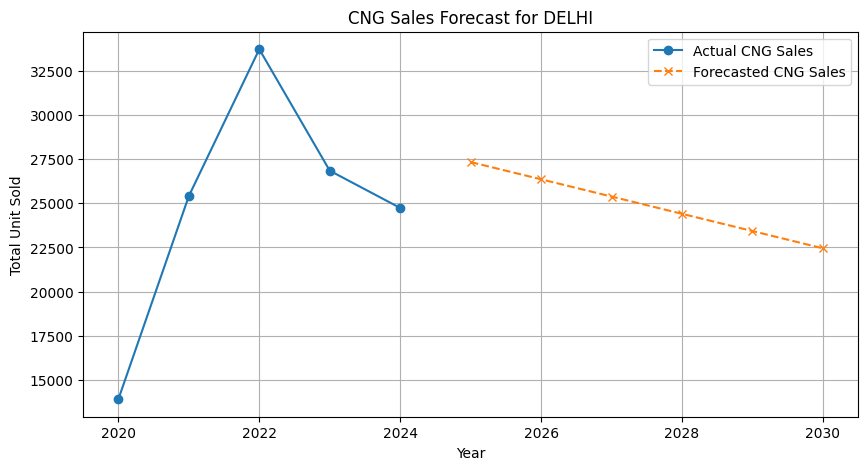

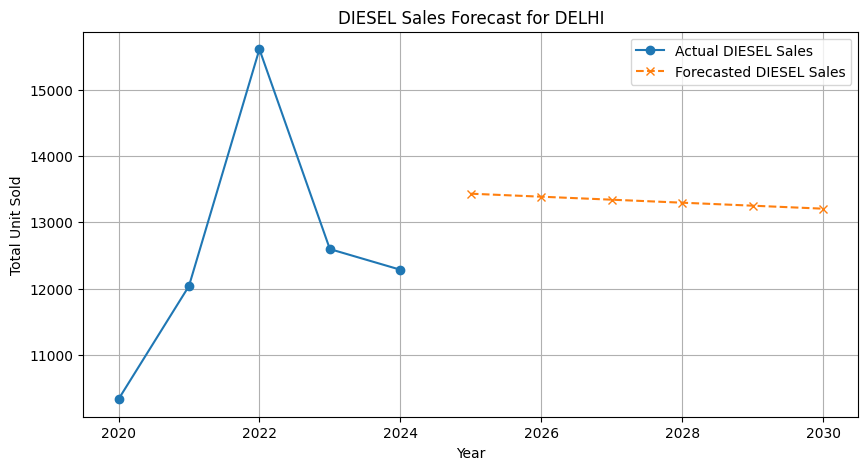

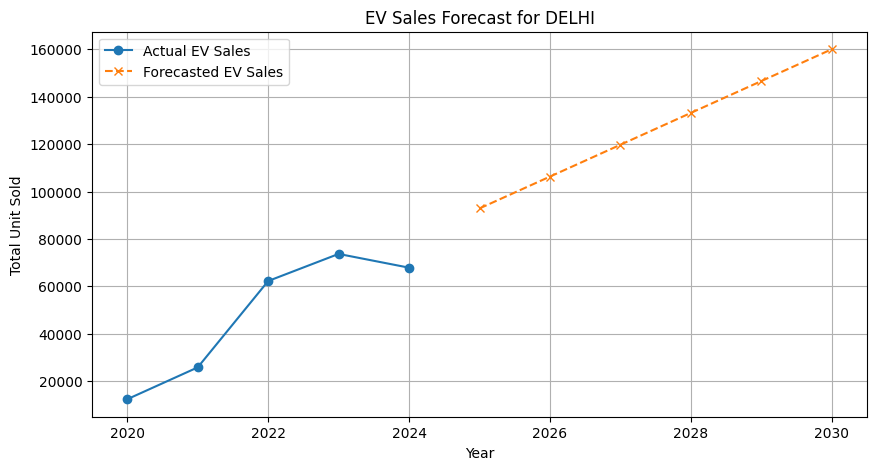

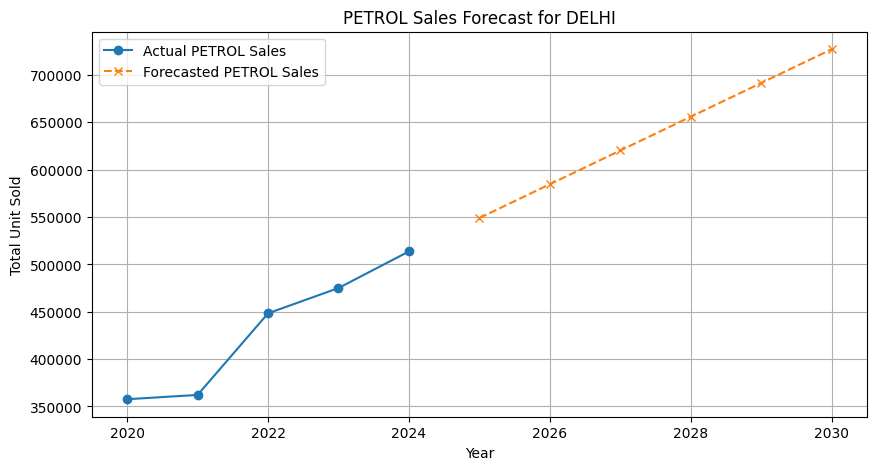

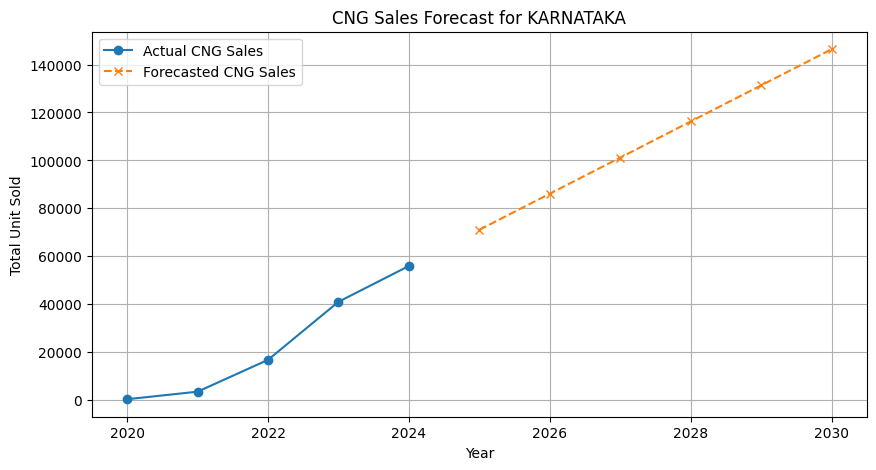

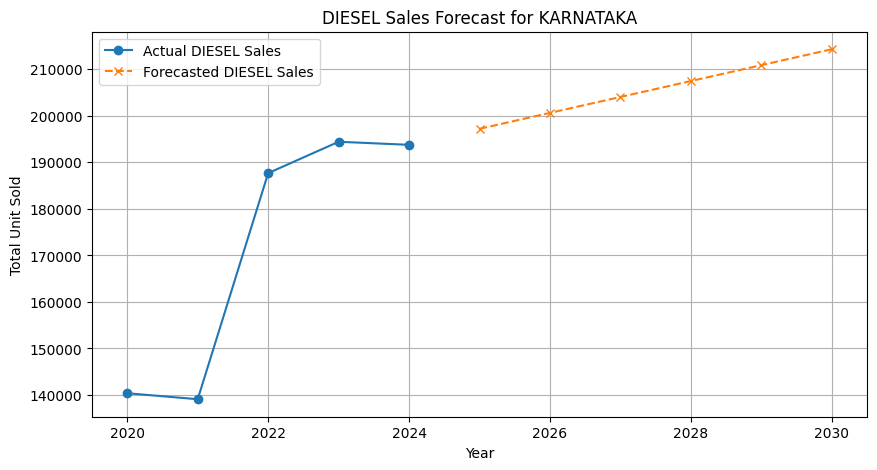

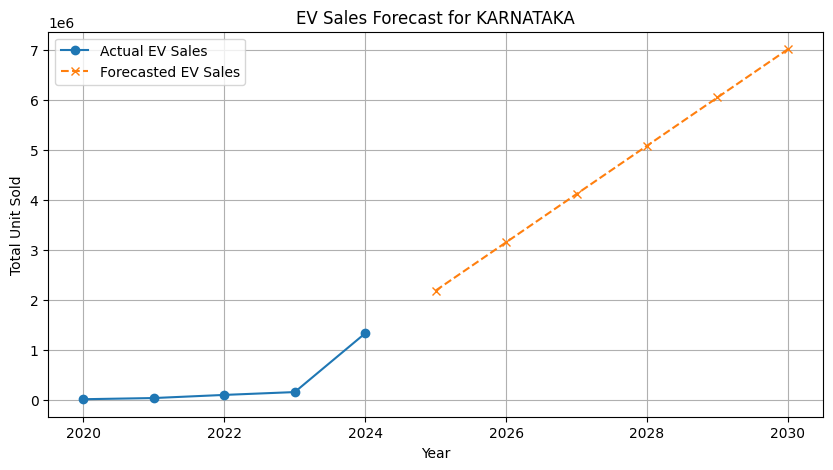

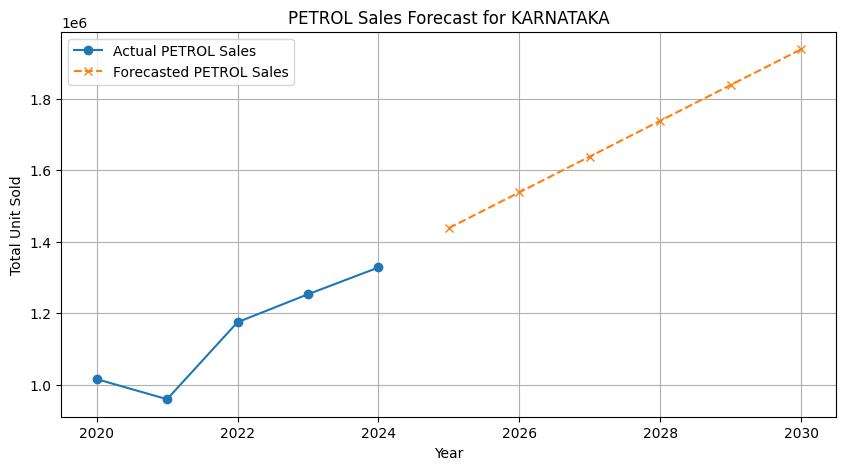

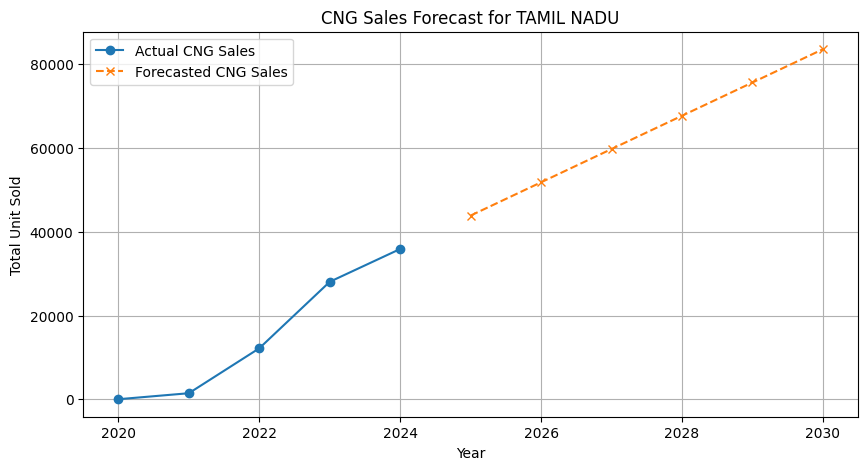

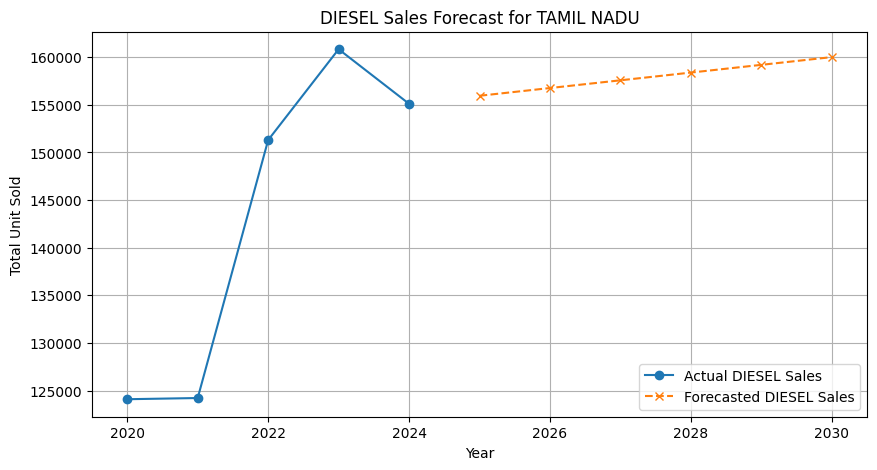

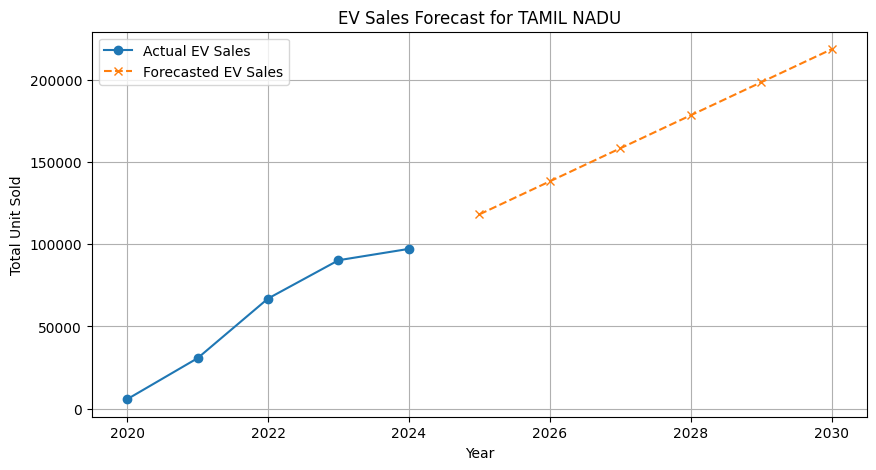

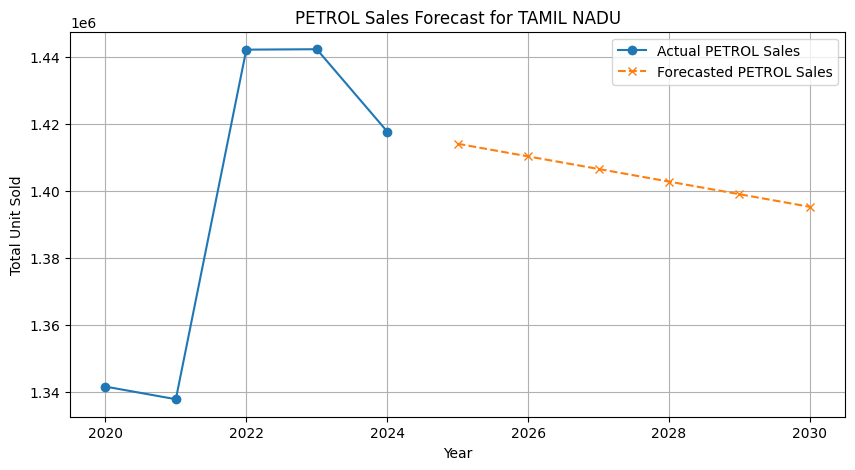

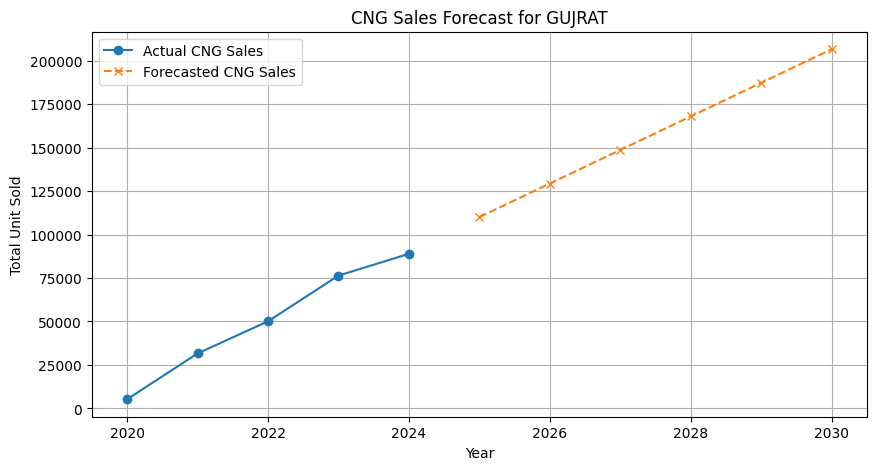

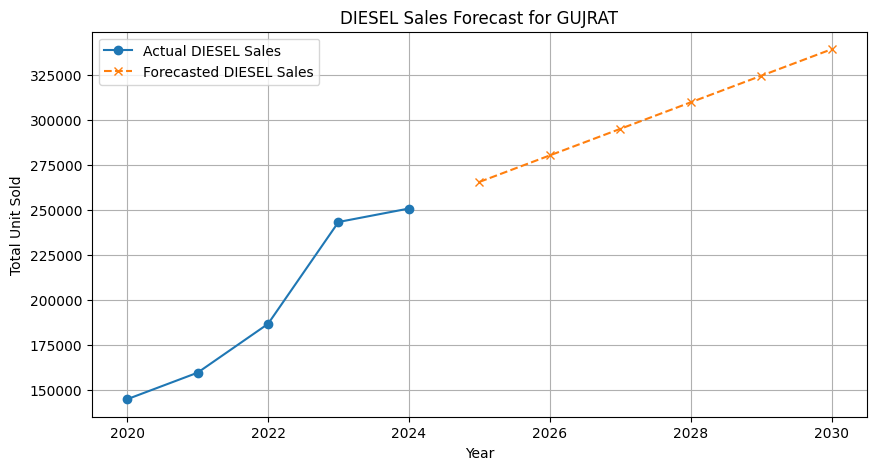

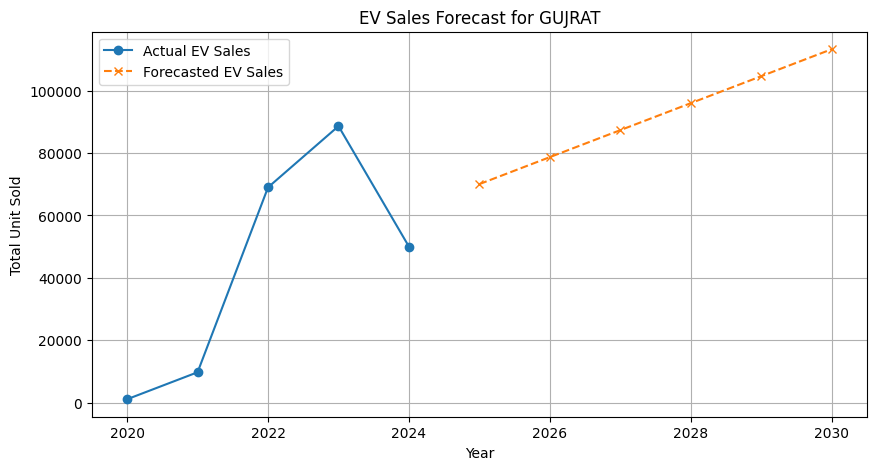

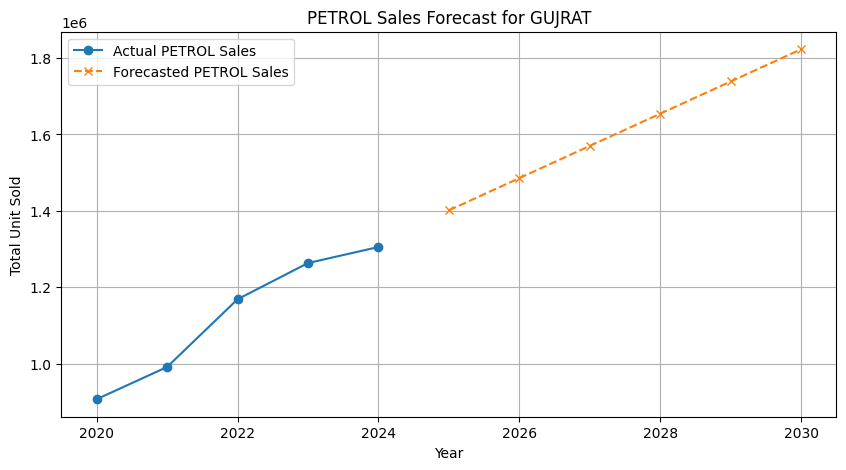

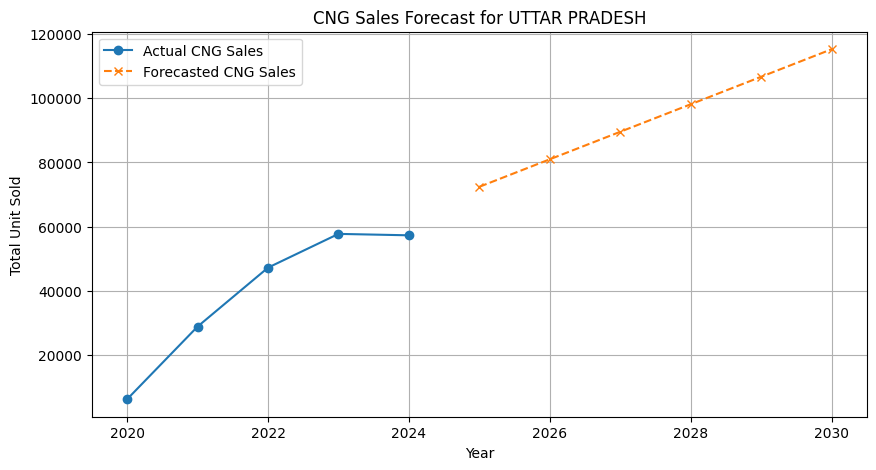

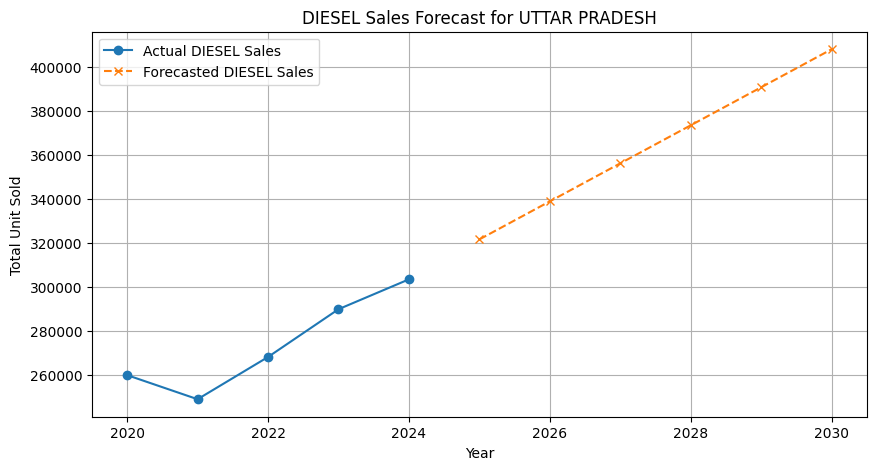

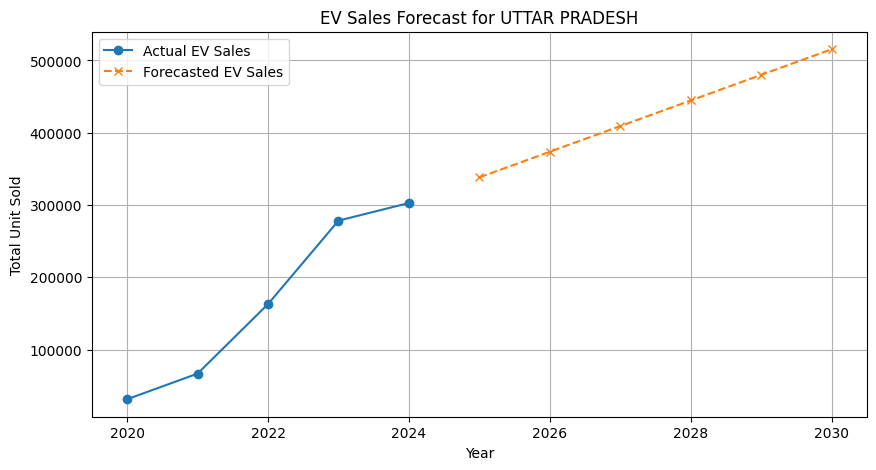

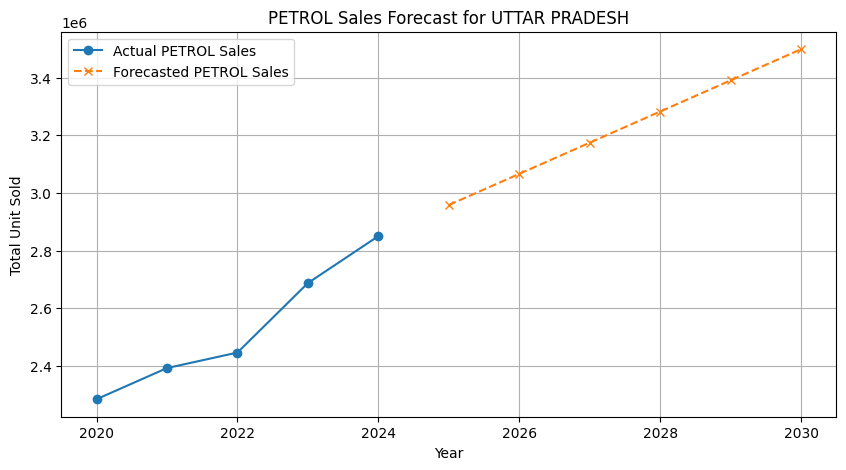

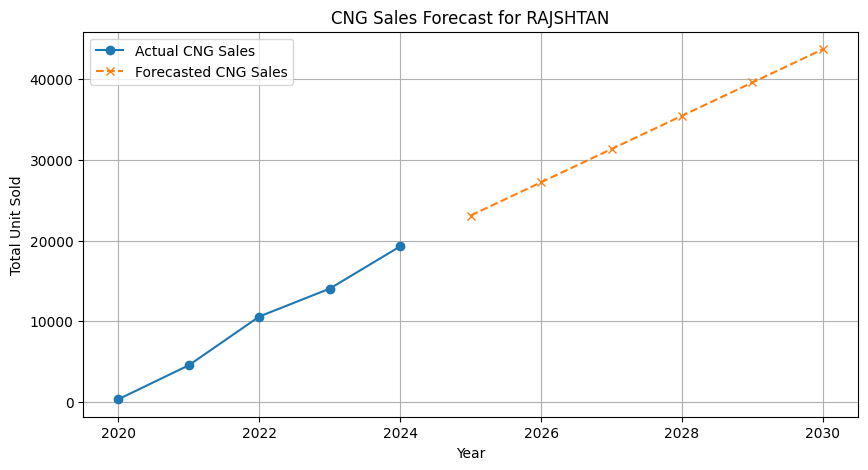

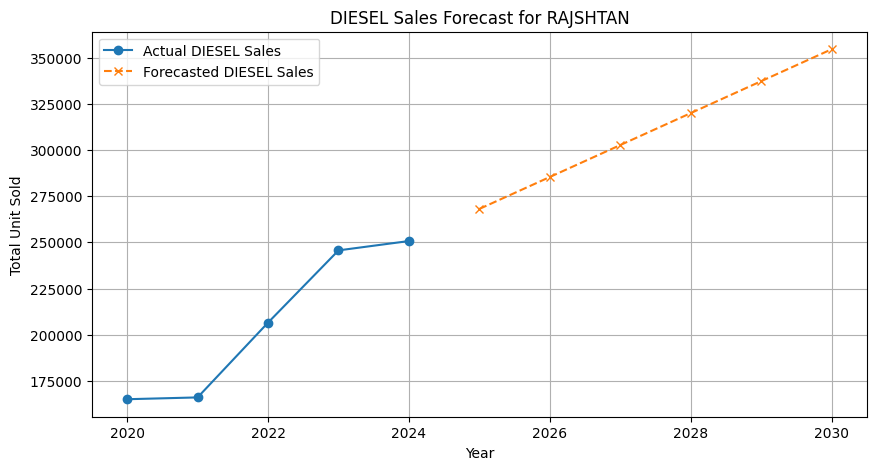

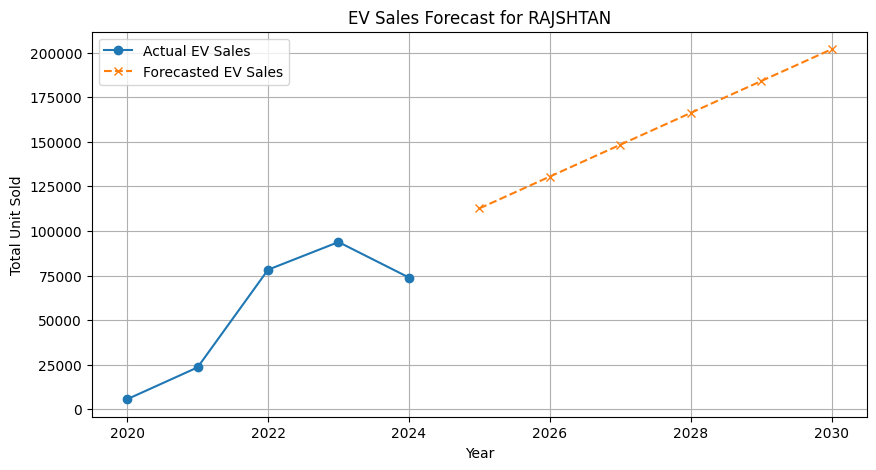

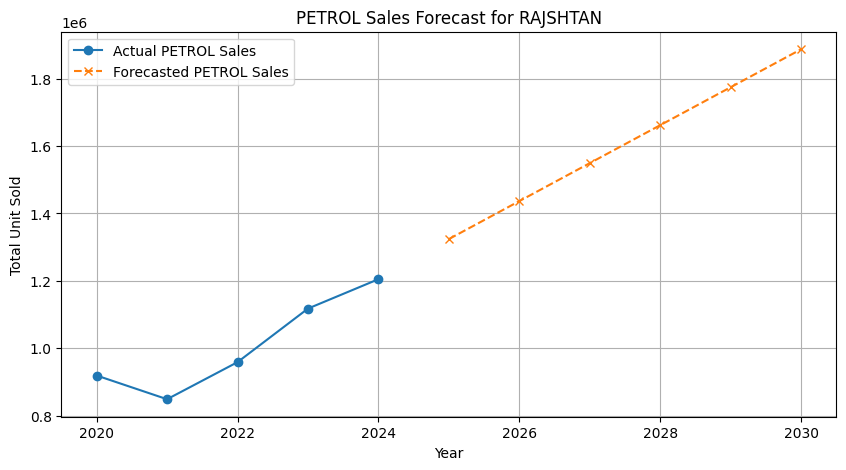

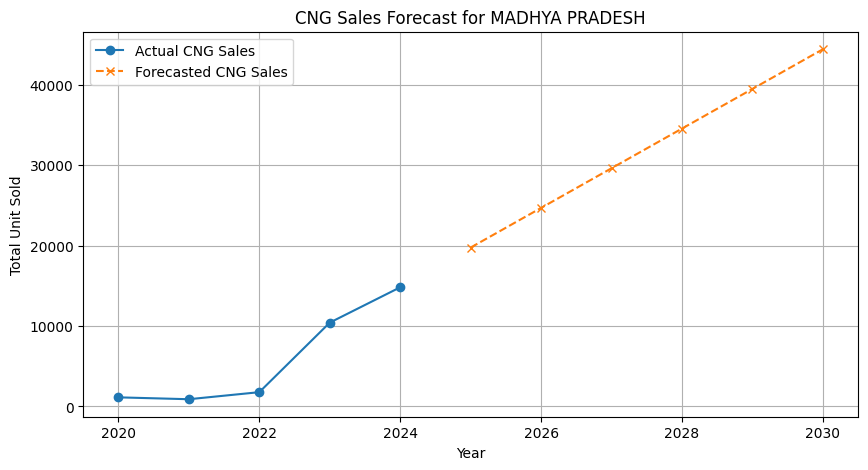

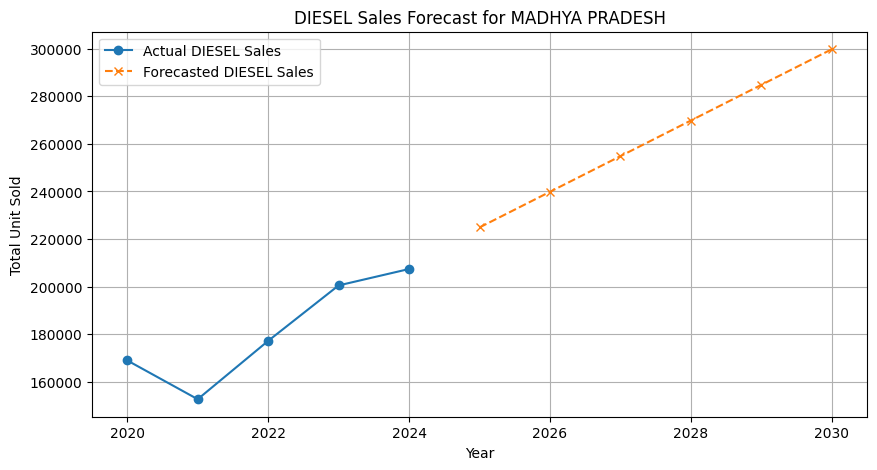

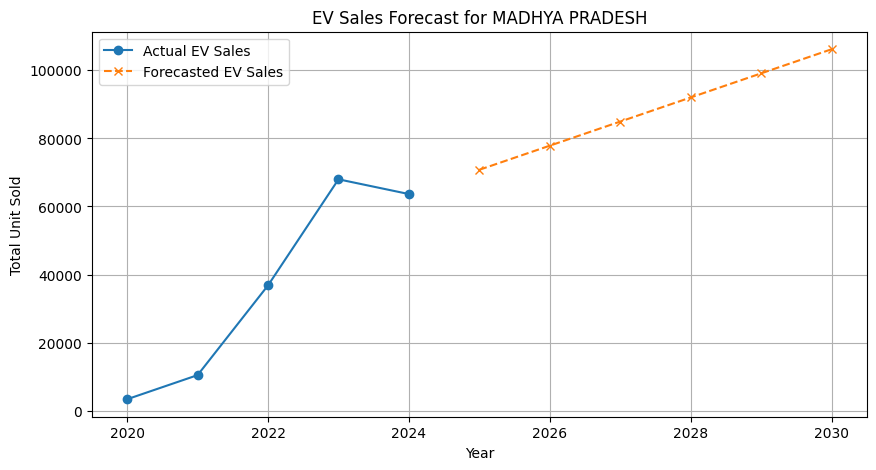

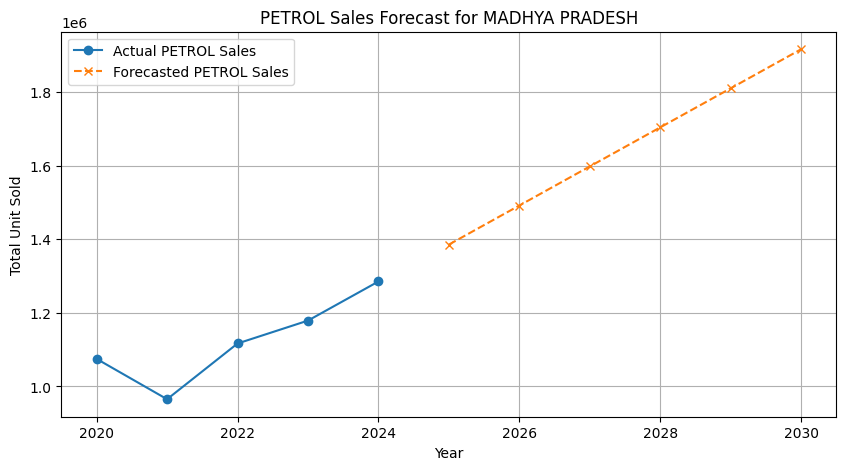

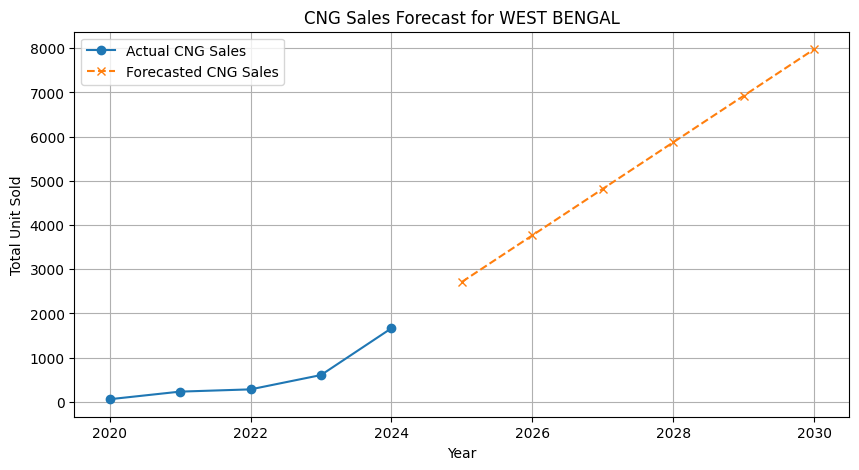

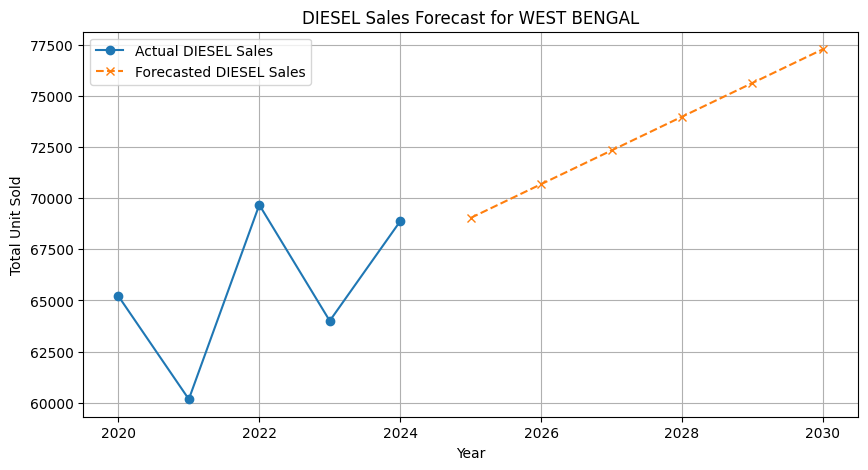

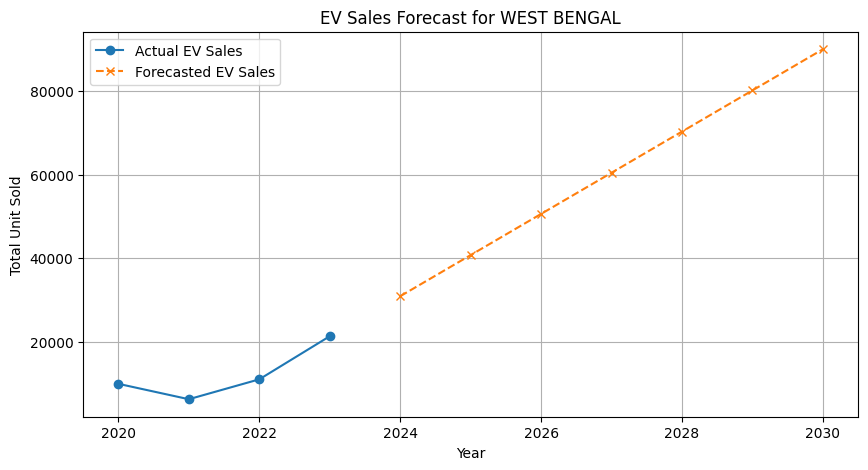

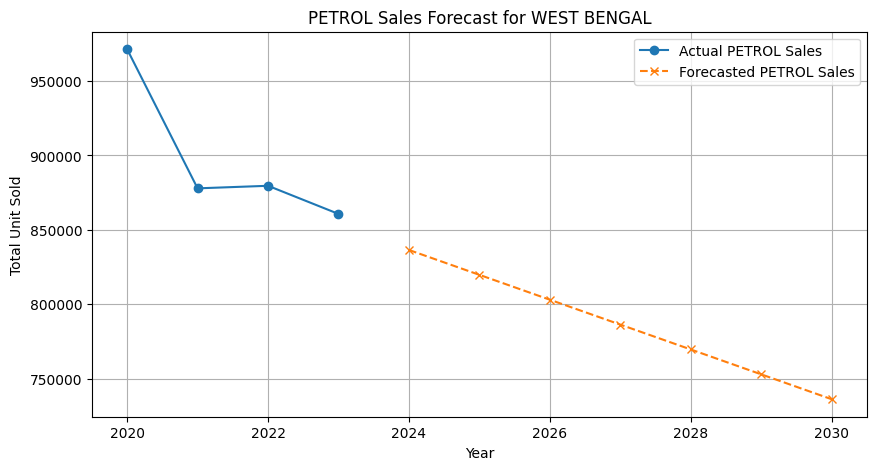

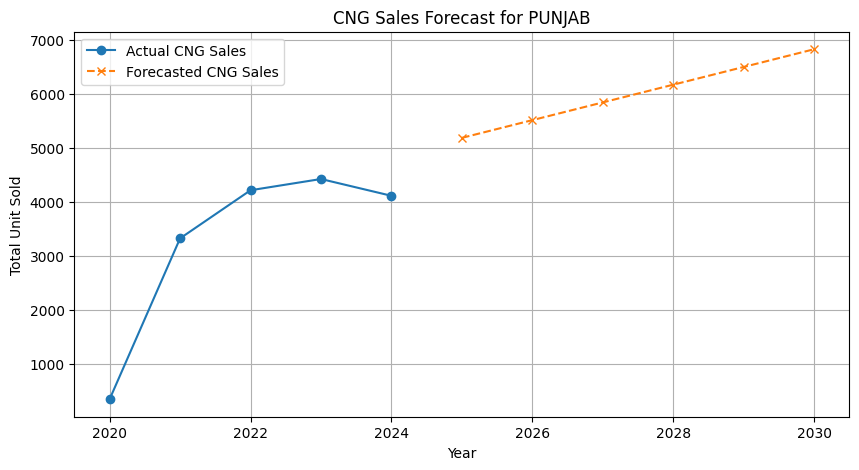

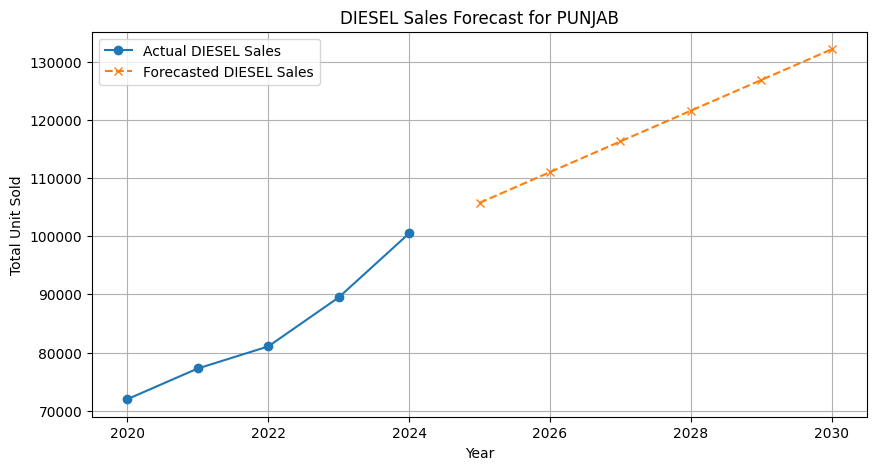

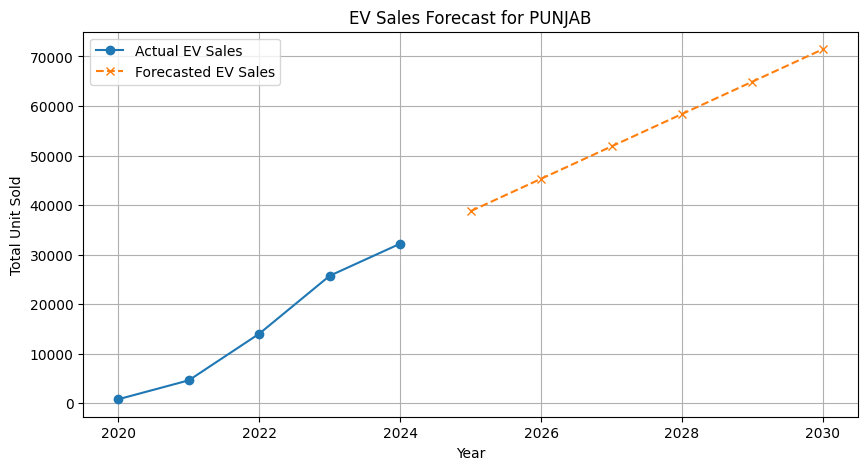

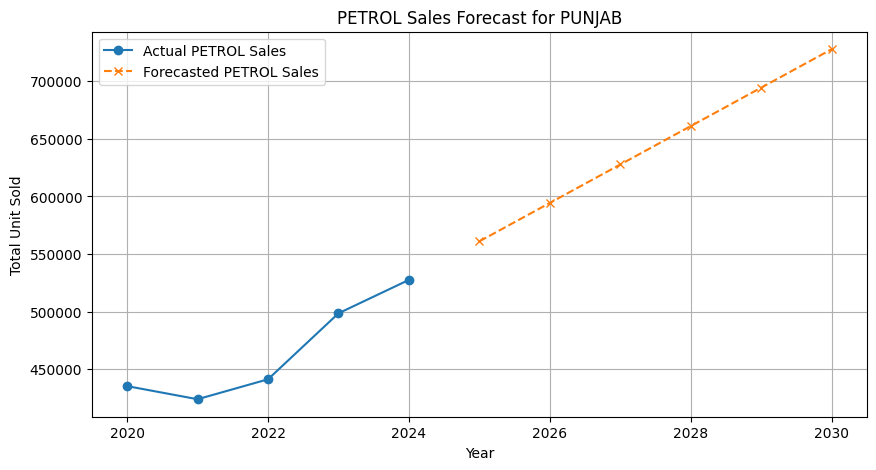

In [ ]:
#customize states for forecast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset
file_path = "State_Wise_Fuel_Sales_&_Decline_Dataset.csv"
df = pd.read_csv(file_path)

# 🔧 Fix 1: Normalize State & Fuel Type Names
df['State'] = df['State'].astype(str).str.strip().str.upper()
df['Fuel Type'] = df['Fuel Type'].astype(str).str.strip().str.upper()

# 🔧 Fix 2: Remove Unnamed Columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 🔧 Fix 3: Ensure 'Total Unit Sold' is Numeric
df['Total Unit Sold'] = pd.to_numeric(df['Total Unit Sold'], errors='coerce')

# 🔧 Fix 4: Manually Define the Correct Top 10 States
top_10_states = [
    "MAHARASHTRA", "DELHI", "KARNATAKA", "TAMIL NADU", "GUJRAT",
    "UTTAR PRADESH", "RAJSHTAN", "MADHYA PRADESH", "WEST BENGAL", "PUNJAB"
]

# Filter dataset for the selected top 10 states
df_filtered = df[df["State"].isin(top_10_states)]

# 🔧 Fix 5: Check if Data Exists
if df_filtered.empty:
    print("Error: No data found for the selected top 10 states!")
    print("Available states in dataset:", df["State"].unique())
    print("Available fuel types:", df["Fuel Type"].unique())
else:
    print(f"Data successfully filtered for top 10 states: {top_10_states}")

# Forecasting Function
def forecast_fuel_sales(state, fuel_type):
    data = df_filtered[(df_filtered["State"] == state) & (df_filtered["Fuel Type"] == fuel_type)]

    if data.empty:
        print(f"Skipping {fuel_type} for {state}, no data available.")
        return None, None

    # Sort data by Year
    data = data.sort_values(by="Year")

    # Fit Exponential Smoothing Model
    model = ExponentialSmoothing(
        data["Total Unit Sold"], trend="add", seasonal=None, seasonal_periods=None
    ).fit()

    # Predict future sales till 2030
    future_years = np.arange(data["Year"].max() + 1, 2031)
    forecast = model.forecast(len(future_years))

    # Print forecasted values
    print(f"\n🔹 {fuel_type} Sales Forecast for {state}:")
    for year, value in zip(future_years, forecast):
        print(f"   {year}: {int(value)} units")

    return future_years, forecast

# Store all forecasts for chart plotting
forecasts = {}

# Step 1: Print all predictions as text first
fuel_types = ["CNG", "DIESEL", "EV", "PETROL"]

for state in top_10_states:
    print(f"\n📌 Processing {state}...")
    forecasts[state] = {}
    for fuel in fuel_types:
        years, sales = forecast_fuel_sales(state, fuel)
        if years is not None:
            forecasts[state][fuel] = (years, sales)

# Step 2: Generate charts after all text output
for state, fuel_data in forecasts.items():
    for fuel, (years, sales) in fuel_data.items():
        data = df_filtered[(df_filtered["State"] == state) & (df_filtered["Fuel Type"] == fuel)]
        plt.figure(figsize=(10, 5))
        plt.plot(data["Year"], data["Total Unit Sold"], marker="o", label=f"Actual {fuel} Sales")
        plt.plot(years, sales, marker="x", linestyle="--", label=f"Forecasted {fuel} Sales")
        plt.title(f"{fuel} Sales Forecast for {state}")
        plt.xlabel("Year")
        plt.ylabel("Total Unit Sold")
        plt.legend()
        plt.grid()
        plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")

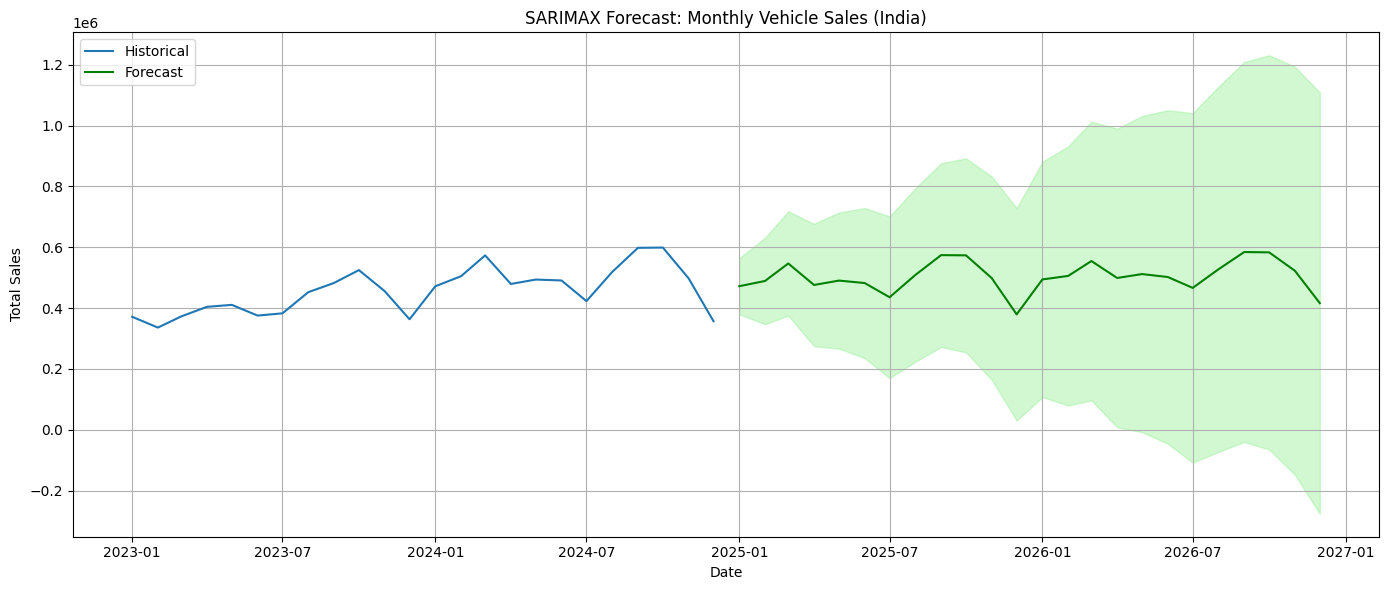


--- India-Wide Monthly Vehicle Sales Forecast (Next 24 Months) ---
Total Sales           mean  mean_ci_lower  mean_ci_upper
2025-01-01   471930.377932  379639.596343   5.642212e+05
2025-02-01   489163.352442  346989.493186   6.313372e+05
2025-03-01   546710.547421  375284.467439   7.181366e+05
2025-04-01   476031.822328  274779.925982   6.772837e+05
2025-05-01   490415.008851  266604.276466   7.142257e+05
2025-06-01   482370.866791  235683.420780   7.290583e+05
2025-07-01   435653.596722  169746.543893   7.015606e+05
2025-08-01   508858.417000  223812.477177   7.939044e+05
2025-09-01   574138.843978  272024.911816   8.762528e+05
2025-10-01   573438.163061  254573.643937   8.923027e+05
2025-11-01   498540.114796  164156.523842   8.329237e+05
2025-12-01   379374.681188   29931.543188   7.288178e+05
2026-01-01   494261.027005  107386.840167   8.811352e+05
2026-02-01   505739.263421   79713.083995   9.317654e+05
2026-03-01   554677.608588   96439.500703   1.012916e+06
2026-04-01   499026.

In [ ]:
#Predict Monthly Vehicle Sales (India-Wide)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your dataset
df = pd.read_csv("/content/Vehicle_Sales_&_Trends_Data(overall india).csv")

# Prepare date column
# Clean datetime parsing (3-letter month abbreviation)
df['ds'] = pd.to_datetime(df['Month'].str[:3] + " " + df['Year'].astype(str), format='%b %Y')

monthly_sales = df.groupby('ds')['Total Sales'].sum().reset_index().sort_values('ds')

# Time series
ts = monthly_sales.set_index('ds')['Total Sales']

# Fit SARIMAX (manual seasonal ARIMA config, tweak as needed)
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Forecast next 24 months
forecast = results.get_forecast(steps=24)
forecast_df = forecast.summary_frame()

# Build timeline for plotting
future_dates = pd.date_range(ts.index[-1] + pd.DateOffset(months=1), periods=24, freq='MS')

# Plot
plt.figure(figsize=(14,6))
plt.plot(ts, label="Historical")
plt.plot(future_dates, forecast_df['mean'], label="Forecast", color='green')
plt.fill_between(future_dates, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='lightgreen', alpha=0.4)
plt.title("SARIMAX Forecast: Monthly Vehicle Sales (India)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print forecast as text
print("\n--- India-Wide Monthly Vehicle Sales Forecast (Next 24 Months) ---")
print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

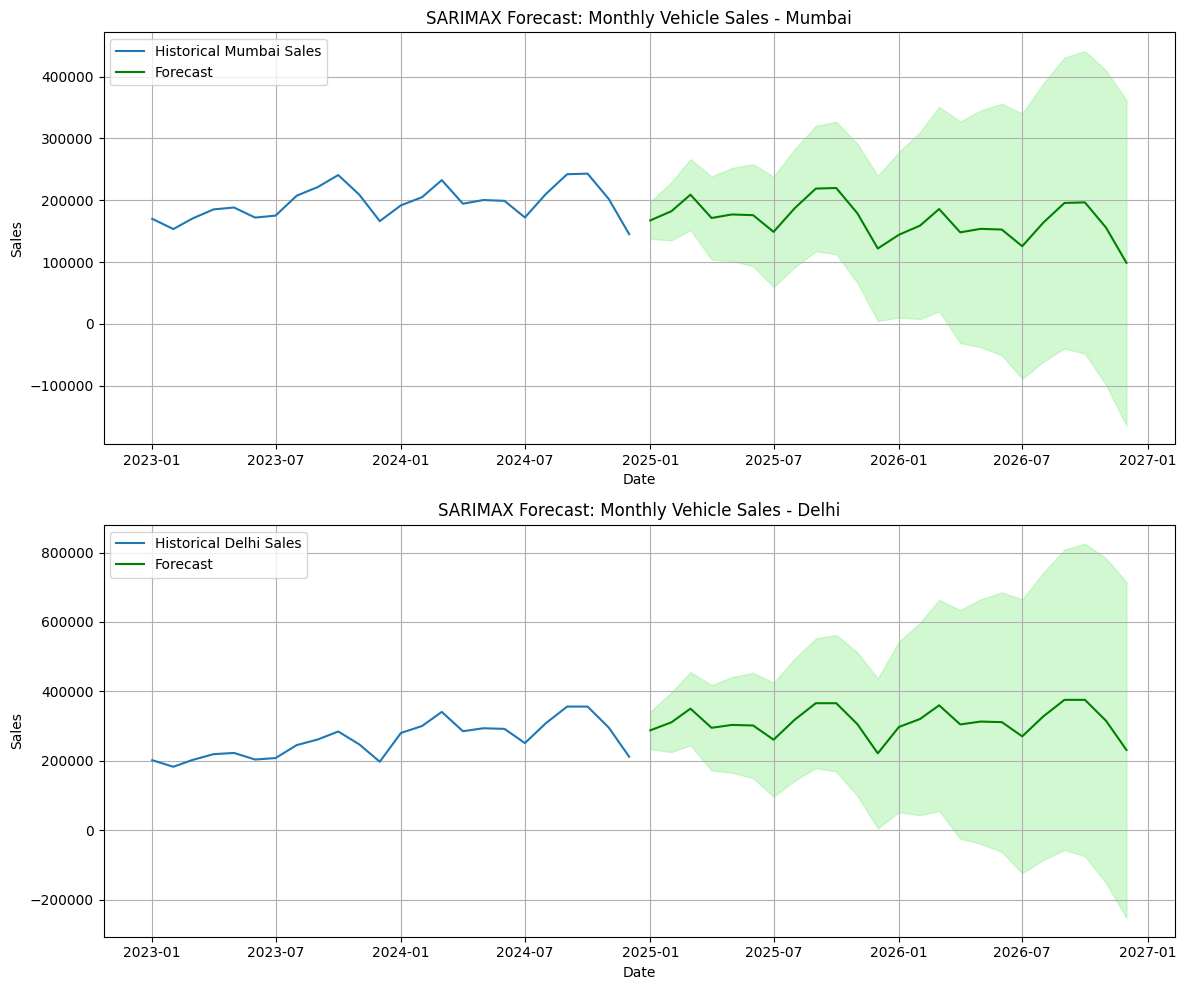


--- Mumbai Sales Forecast (Next 24 Months) ---
Mumbai Sales           mean  mean_ci_lower  mean_ci_upper
2025-01-01    167407.684725  137493.297617  197322.071832
2025-02-01    182225.288135  135270.448159  229180.128111
2025-03-01    209045.261608  151620.552266  266469.970949
2025-04-01    171306.638249  104251.881796  238361.394702
2025-05-01    177006.267757  101895.681074  252116.854441
2025-06-01    175852.794329   93309.420042  258396.168617
2025-07-01    148852.610260   59566.973825  238138.246694
2025-08-01    187121.662746   91533.652810  282709.672683
2025-09-01    218881.656247  117398.161008  320365.151487
2025-10-01    219810.149640  112747.625036  326872.674244
2025-11-01    178925.907865   66564.688819  291287.126910
2025-12-01    121964.526295    4541.722916  239387.329674
2026-01-01    144155.403031   10416.621613  277894.184450
2026-02-01    158973.409824    7886.008149  310060.811498
2026-03-01    185793.181911   20451.630225  351134.733597
2026-04-01    148054.659

In [ ]:
#Predict Monthly Vehicle Sales (mumbai & delhi)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your dataset
df = pd.read_csv("/content/Vehicle_Sales_&_Trends_Data(overall india).csv")

# Fix: Map full month names to abbreviated ones
month_mapping = {
    "January": "Jan", "February": "Feb", "March": "Mar", "April": "Apr",
    "May": "May", "June": "Jun", "July": "Jul", "August": "Aug",
    "September": "Sep", "October": "Oct", "November": "Nov", "December": "Dec"
}
df['Month'] = df['Month'].str.strip().map(month_mapping)

# Convert to datetime format
df['ds'] = pd.to_datetime(df['Year'].astype(str) + "-" + df['Month'], format='%Y-%b')

# Drop rows with missing sales
df = df.dropna(subset=['Mumbai Sales', 'Delhi Sales'])

# Ensure sales values are numeric
df['Mumbai Sales'] = pd.to_numeric(df['Mumbai Sales'], errors='coerce')
df['Delhi Sales'] = pd.to_numeric(df['Delhi Sales'], errors='coerce')

# Filter and sort
df = df.sort_values('ds').dropna()

# Group monthly sales
mumbai_sales = df[['ds', 'Mumbai Sales']].groupby('ds').sum().reset_index()
delhi_sales = df[['ds', 'Delhi Sales']].groupby('ds').sum().reset_index()

# Define SARIMAX training function
def train_sarimax(data, city_name):
    ts = data.set_index('ds')[city_name]

    # Check for sufficient variation
    if ts.nunique() <= 1:
        raise ValueError(f"Not enough variation in {city_name} sales data.")

    model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12),
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    forecast = results.get_forecast(steps=24)
    forecast_df = forecast.summary_frame()
    future_dates = pd.date_range(ts.index[-1] + pd.DateOffset(months=1), periods=24, freq='MS')

    return ts, future_dates, forecast_df

# Train and forecast
try:
    mumbai_ts, mumbai_dates, mumbai_forecast = train_sarimax(mumbai_sales, 'Mumbai Sales')
    delhi_ts, delhi_dates, delhi_forecast = train_sarimax(delhi_sales, 'Delhi Sales')
except ValueError as e:
    print(f"Error: {e}")
    exit()

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Mumbai plot
axes[0].plot(mumbai_ts, label="Historical Mumbai Sales")
axes[0].plot(mumbai_dates, mumbai_forecast['mean'], label="Forecast", color='green')
axes[0].fill_between(mumbai_dates, mumbai_forecast['mean_ci_lower'], mumbai_forecast['mean_ci_upper'], color='lightgreen', alpha=0.4)
axes[0].set_title("SARIMAX Forecast: Monthly Vehicle Sales - Mumbai")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Sales")
axes[0].grid(True)
axes[0].legend()

# Delhi plot
axes[1].plot(delhi_ts, label="Historical Delhi Sales")
axes[1].plot(delhi_dates, delhi_forecast['mean'], label="Forecast", color='green')
axes[1].fill_between(delhi_dates, delhi_forecast['mean_ci_lower'], delhi_forecast['mean_ci_upper'], color='lightgreen', alpha=0.4)
axes[1].set_title("SARIMAX Forecast: Monthly Vehicle Sales - Delhi")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Sales")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

# Show forecast in text
print("\n--- Mumbai Sales Forecast (Next 24 Months) ---")
mumbai_forecast_display = mumbai_forecast[['mean', 'mean_ci_lower', 'mean_ci_upper']]
mumbai_forecast_display.index = mumbai_dates
print(mumbai_forecast_display)

print("\n--- Delhi Sales Forecast (Next 24 Months) ---")
delhi_forecast_display = delhi_forecast[['mean', 'mean_ci_lower', 'mean_ci_upper']]
delhi_forecast_display.index = delhi_dates
print(delhi_forecast_display)



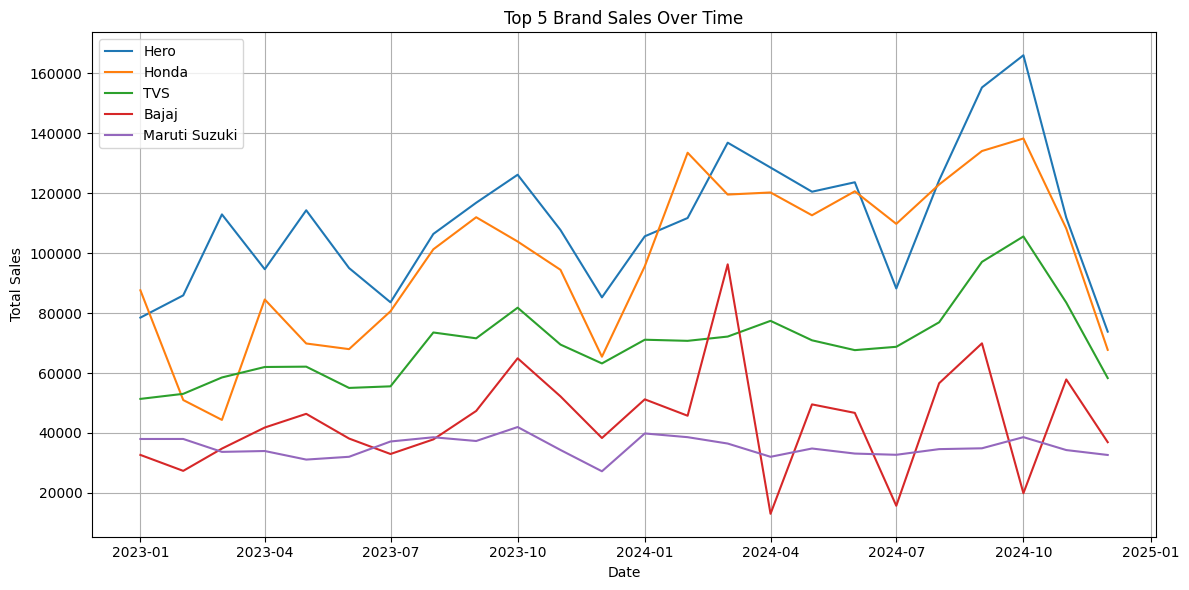


🔹 Top 5 Brands by Total Sales:
Brand
Hero             2653895
Honda            2346267
TVS              1677349
Bajaj            1053880
Maruti Suzuki     845683


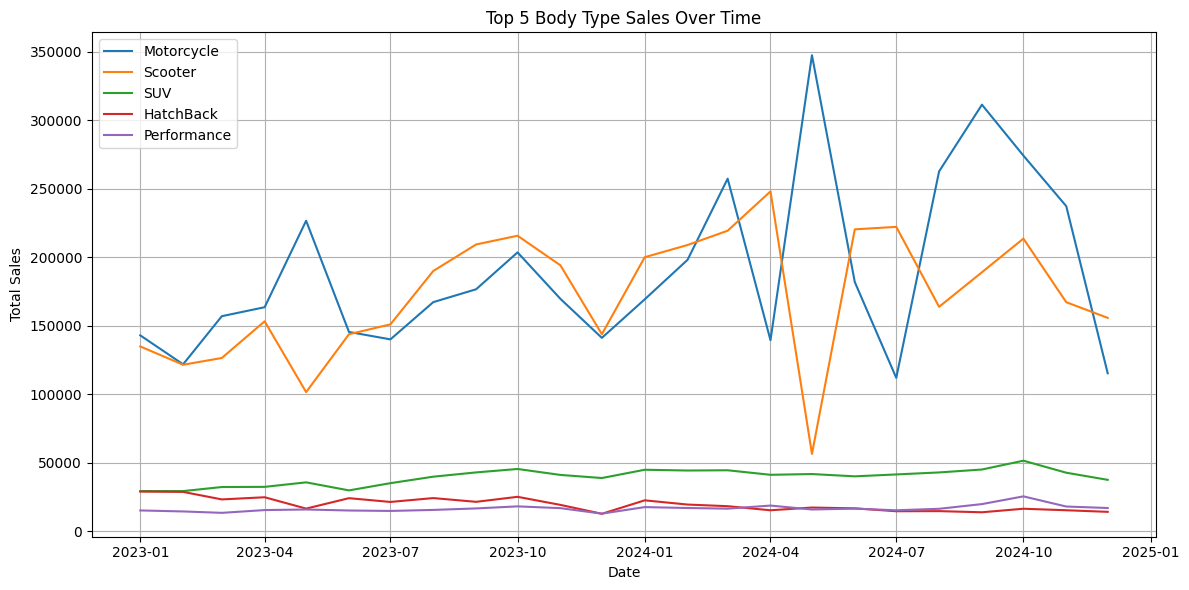


🔹 Top 5 Body Types by Total Sales:
Body Type
Motorcycle     4563920
Scooter        4152027
SUV             950561
HatchBack       469570
Performance     398949


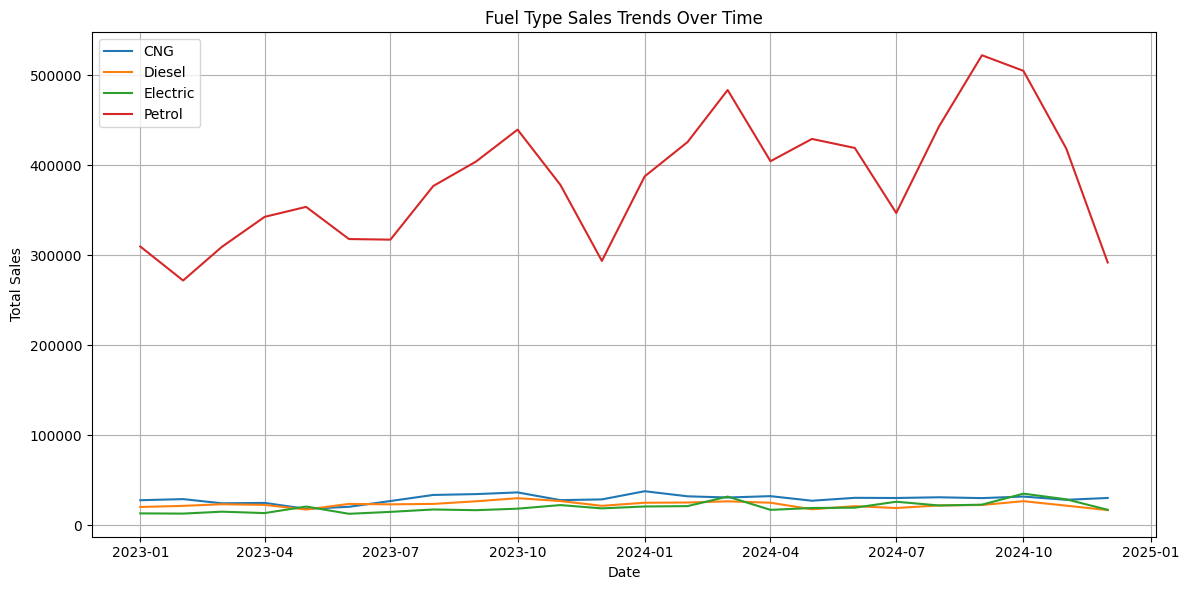


🔹 Total Sales by Fuel Type:
Fuel Type
Petrol      9195051
CNG          708689
Diesel       553731
Electric     481443


In [ ]:
#Trend Model and bodytype
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/Vehicle_Sales_&_Trends_Data(overall india).csv")

# Convert date
df['ds'] = pd.to_datetime(df['Month'].str[:3] + ' ' + df['Year'].astype(str), format='%b %Y')

# --- 1. Brand Performance ---
brand_sales = df.groupby(['ds', 'Brand'])['Total Sales'].sum().reset_index()
top_brands = brand_sales.groupby('Brand')['Total Sales'].sum().sort_values(ascending=False).head(5).index.tolist()
brand_filtered = brand_sales[brand_sales['Brand'].isin(top_brands)]

# Plot
plt.figure(figsize=(12, 6))
for brand in top_brands:
    plt.plot(brand_filtered[brand_filtered['Brand'] == brand]['ds'],
             brand_filtered[brand_filtered['Brand'] == brand]['Total Sales'], label=brand)
plt.title("Top 5 Brand Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print top brands text summary
print("\n🔹 Top 5 Brands by Total Sales:")
total_brand_sales = brand_sales.groupby('Brand')['Total Sales'].sum().sort_values(ascending=False)
print(total_brand_sales.head(5).to_string())

# --- 2. Body Type Performance ---
body_sales = df.groupby(['ds', 'Body Type'])['Total Sales'].sum().reset_index()
top_bodies = body_sales.groupby('Body Type')['Total Sales'].sum().sort_values(ascending=False).head(5).index.tolist()
body_filtered = body_sales[body_sales['Body Type'].isin(top_bodies)]

# Plot
plt.figure(figsize=(12, 6))
for body in top_bodies:
    plt.plot(body_filtered[body_filtered['Body Type'] == body]['ds'],
             body_filtered[body_filtered['Body Type'] == body]['Total Sales'], label=body)
plt.title("Top 5 Body Type Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print top body types text summary
print("\n🔹 Top 5 Body Types by Total Sales:")
total_body_sales = body_sales.groupby('Body Type')['Total Sales'].sum().sort_values(ascending=False)
print(total_body_sales.head(5).to_string())

# --- 3. Fuel Type Trend ---
fuel_sales = df.groupby(['ds', 'Fuel Type'])['Total Sales'].sum().reset_index()
fuel_types = fuel_sales['Fuel Type'].unique()

# Plot
plt.figure(figsize=(12, 6))
for fuel in fuel_types:
    plt.plot(fuel_sales[fuel_sales['Fuel Type'] == fuel]['ds'],
             fuel_sales[fuel_sales['Fuel Type'] == fuel]['Total Sales'], label=fuel)
plt.title("Fuel Type Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print fuel type summary
print("\n🔹 Total Sales by Fuel Type:")
total_fuel_sales = fuel_sales.groupby('Fuel Type')['Total Sales'].sum().sort_values(ascending=False)
print(total_fuel_sales.to_string())



📈 EV Forecast for 2030:
            Forecasted Sales
ds                          
2025-01-01             99085
2025-02-01            100179
2025-03-01            101202
2025-04-01            102157
2025-05-01            103047
2025-06-01            103877
2025-07-01            104648
2025-08-01            105364
2025-09-01            106028
2025-10-01            106644
2025-11-01            107215
2025-12-01            107742


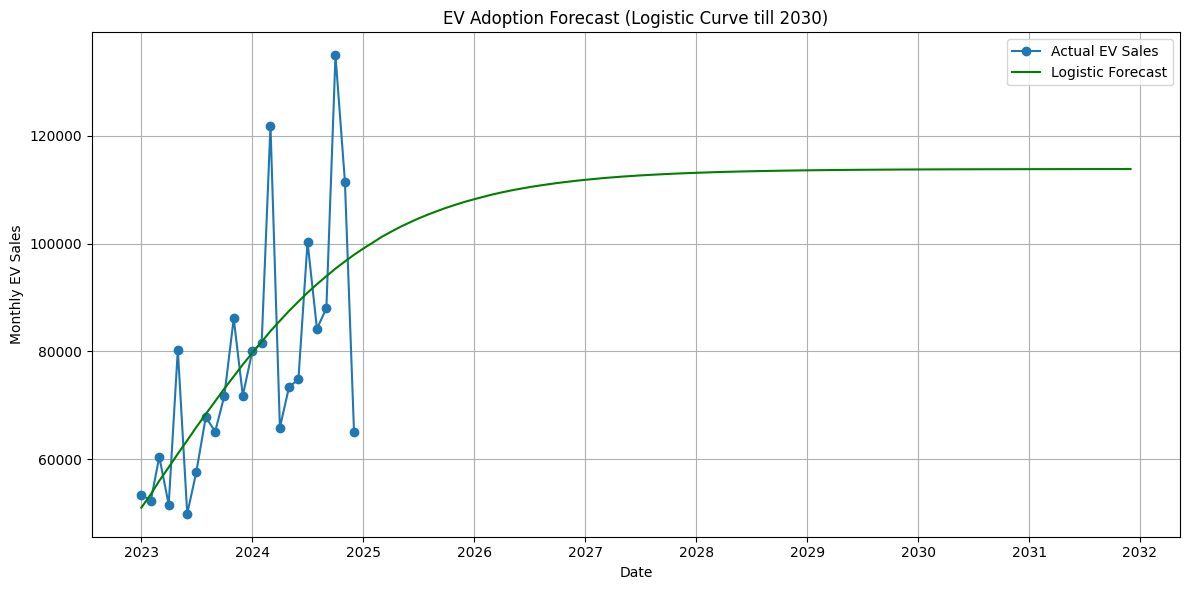

In [ ]:
#adoption of EV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data
df = pd.read_csv("/content/Vehicle_Sales_&_Trends_Data(overall india).csv")

# Clean and convert date
df['ds'] = pd.to_datetime(df['Month'].str[:3] + " " + df['Year'].astype(str), format="%b %Y")

# Robust EV filter
df['Fuel Type'] = df['Fuel Type'].str.strip().str.upper()
ev_df = df[df['Fuel Type'].isin(['EV', 'ELECTRIC'])].copy()

# Group monthly EV sales
ev_monthly = ev_df.groupby('ds')['Monthly Sales'].sum().reset_index().sort_values('ds')

# DEBUG: Check if EV data exists
if ev_monthly.empty:
    raise ValueError("⚠️ No EV sales data found! Please check the 'Fuel Type' column.")

# Prepare logistic growth model
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Prepare data for fitting
ev_monthly['t'] = np.arange(len(ev_monthly))
x = ev_monthly['t'].values
y = ev_monthly['Monthly Sales'].values

# Initial guess: [K (max sales), r (growth rate), t0 (inflection)]
p0 = [max(y)*10, 0.3, x.mean()]

# Fit logistic curve
params, _ = curve_fit(logistic, x, y, p0, maxfev=10000)
K, r, t0 = params

# Forecast till 2030
future_months = 12 * (2030 - ev_monthly['ds'].dt.year.max()) + 12
x_future = np.arange(len(ev_monthly) + future_months)
y_pred = logistic(x_future, *params)

# Dates for forecast
last_date = ev_monthly['ds'].max()
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=future_months, freq='MS')
all_dates = pd.date_range(ev_monthly['ds'].min(), periods=len(x_future), freq='MS')

# Print final predicted sales in 2030
pred_2030 = pd.DataFrame({'ds': future_dates, 'Forecasted Sales': y_pred[-future_months:].astype(int)})
print("\n📈 EV Forecast for 2030:")
print(pred_2030.set_index('ds').head(12))

# Plot
plt.figure(figsize=(12,6))
plt.plot(ev_monthly['ds'], y, label='Actual EV Sales', marker='o')
plt.plot(all_dates, y_pred, label='Logistic Forecast', color='green')
plt.title("EV Adoption Forecast (Logistic Curve till 2030)")
plt.xlabel("Date")
plt.ylabel("Monthly EV Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



📈 CNG Forecast for 2030:
            Forecasted Sales
ds                          
2025-01-01            119405
2025-02-01            119577
2025-03-01            119725
2025-04-01            119852
2025-05-01            119961
2025-06-01            120055
2025-07-01            120136
2025-08-01            120205
2025-09-01            120265
2025-10-01            120316
2025-11-01            120360
2025-12-01            120398


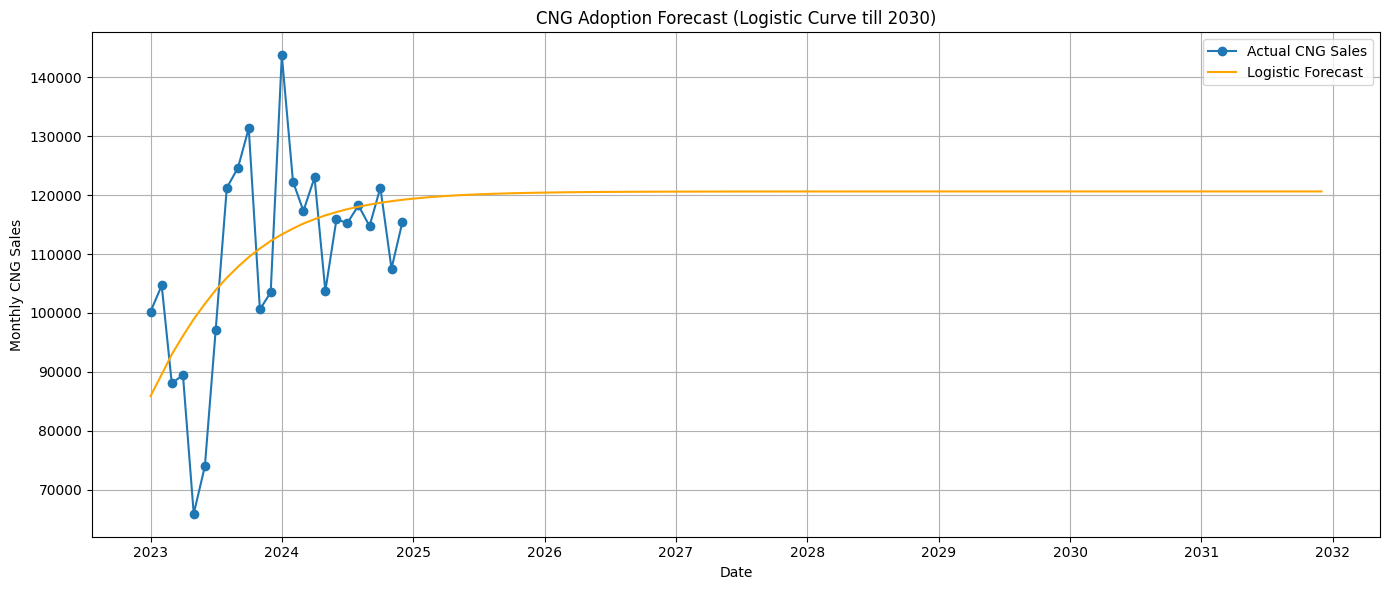

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Load Data ---
df = pd.read_csv("/content/Vehicle_Sales_&_Trends_Data(overall india).csv")

# --- Convert Date ---
df['ds'] = pd.to_datetime(df['Month'].str[:3] + " " + df['Year'].astype(str), format="%b %Y")

# --- Filter CNG Sales ---
df['Fuel Type'] = df['Fuel Type'].str.strip().str.upper()
cng_df = df[df['Fuel Type'].str.contains('CNG')].copy()

# --- Aggregate Monthly CNG Sales ---
cng_monthly = cng_df.groupby('ds')['Monthly Sales'].sum().reset_index().sort_values('ds')

# --- Check if Data Exists ---
if cng_monthly.empty:
    raise ValueError("⚠️ No CNG sales data found. Please check the 'Fuel Type' column.")

# --- Logistic Function ---
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# --- Prepare Time Series ---
cng_monthly['t'] = np.arange(len(cng_monthly))
x = cng_monthly['t'].values
y = cng_monthly['Monthly Sales'].values

# --- Initial Parameters Guess ---
p0 = [max(y)*10, 0.25, x.mean()]  # Adjusted growth rate for CNG

# --- Curve Fitting ---
params, _ = curve_fit(logistic, x, y, p0, maxfev=10000)
K, r, t0 = params

# --- Forecast Until 2030 ---
future_months = 12 * (2030 - cng_monthly['ds'].dt.year.max()) + 12
x_future = np.arange(len(cng_monthly) + future_months)
y_pred = logistic(x_future, *params)

# --- Dates for Plotting ---
last_date = cng_monthly['ds'].max()
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=future_months, freq='MS')
all_dates = pd.date_range(cng_monthly['ds'].min(), periods=len(x_future), freq='MS')

# --- Forecast Table Output ---
pred_2030 = pd.DataFrame({'ds': future_dates, 'Forecasted Sales': y_pred[-future_months:].astype(int)})
print("\n📈 CNG Forecast for 2030:")
print(pred_2030.set_index('ds').head(12))

# --- Plotting ---
plt.figure(figsize=(14,6))
plt.plot(cng_monthly['ds'], y, label='Actual CNG Sales', marker='o')
plt.plot(all_dates, y_pred, label='Logistic Forecast', color='orange')
plt.title("CNG Adoption Forecast (Logistic Curve till 2030)")
plt.xlabel("Date")
plt.ylabel("Monthly CNG Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



--- Forecasted Sales Data ---
CNG: [ 225265.54        270318.648       318976.00464     376391.6854752
  444142.18886074  524087.78285567  618423.58376969  729739.82884823
  802713.81173306  882985.19290636  971283.712197   1068412.0834167
 1175253.29175837 1292778.6209342  1422056.48302762 1564262.13133039
 1720688.34446343 1892757.17890977]
Diesel: [161214.         145092.6        130583.34       117525.006
 105772.5054      95195.25486     85675.729374    77108.1564366
  69397.34079294  62457.60671365  56211.84604228  50590.66143805
  45531.59529425  40978.43576482  36880.59218834  33192.53296951
  29873.27967256  26885.9517053 ]
Electric: [ 111731.          128490.65        147764.2475      169928.884625
  195418.21731875  224730.94991656  258440.59240405  297206.68126465
  341787.68345435  393055.8359725   452014.21136838  519816.34307364
  597788.79453468  687457.11371488  790575.68077212  909162.03288794
 1045536.33782113 1202366.78849429]
Petrol: [2208682.         2054074.26  

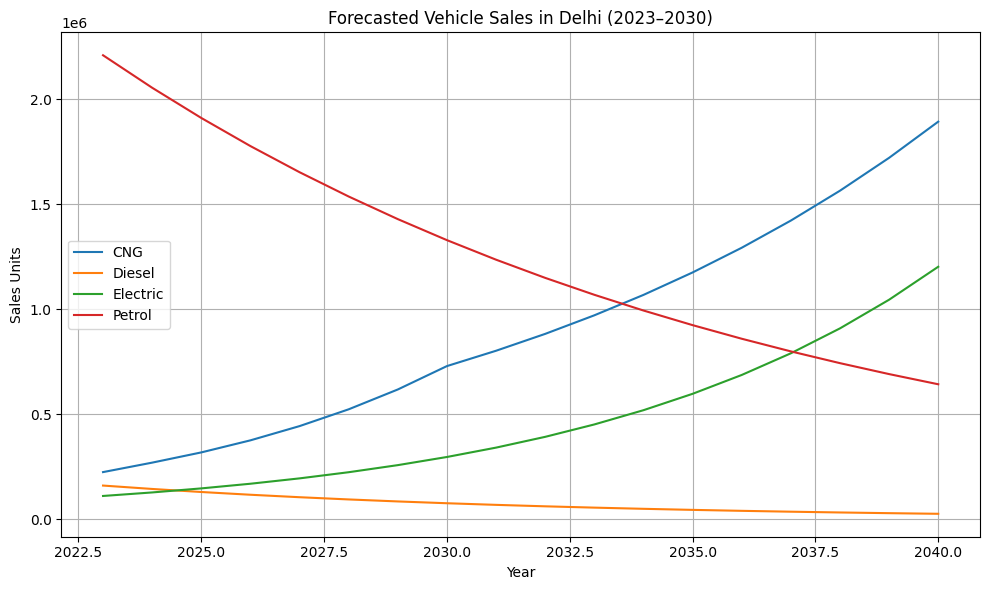

In [ ]:
#effect of policy on all fuels in future if it add
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- SETTINGS ---
city_name = "Delhi"  # Change to "Mumbai" for Mumbai forecast
policy_cutoffs = {
    "EV_Car": {"rate": 0.15, "end_year": 2025},
    "EV_2W": {"rate": 0.40, "end_year": 2025},
    "CNG": {
        "Delhi": {2023: 0.18, 2024: 0.20},
        "Mumbai": {2023: 0.14, 2024: 0.16}
    },
    "Ban": {
        "Delhi": 2024,
        "Mumbai": 2025
    }
}

# --- LOAD DATA ---
file_path = "/content/Vehicle_Sales_&_Trends_Data(overall india).csv"
df = pd.read_csv(file_path)

# --- CLEAN & FILTER ---
df_city = df[["Year", "Fuel Type", f"{city_name} Sales"]].copy()
df_city.rename(columns={f"{city_name} Sales": "Sales"}, inplace=True)

# Group by Year & Fuel Type
df_city = df_city.groupby(["Year", "Fuel Type"]).agg({"Sales": "sum"}).reset_index()



# --- SEPARATE FUEL TYPES ---
years = np.arange(2023, 2031)
fuel_groups = df_city.groupby("Fuel Type")
fuel_forecasts = {}

for fuel, group in fuel_groups:
    past = group.set_index("Year")["Sales"].reindex(years, fill_value=0)
    forecast = pd.Series(index=years, dtype='float64')

    # EV Growth Fix
    if "Electric" in fuel:
        base = max(past[2023], 5000)
        for y in years:
            if y == 2023:
                forecast[y] = base
            elif y <= policy_cutoffs["EV_Car"]["end_year"]:
                forecast[y] = forecast[y - 1] * (1 + policy_cutoffs["EV_Car"]["rate"])
            else:
                forecast[y] = forecast[y - 1] * 1.15  # Natural post-policy growth

    # CNG Growth
    elif "CNG" in fuel:
        base = max(past[2023], 10000)
        for y in years:
            promo = policy_cutoffs["CNG"][city_name].get(y, 0.18)
            base = base * (1 + promo)
            forecast[y] = max(base, 10000)

    # Petrol & Diesel Decline
    elif fuel in ["Petrol", "Diesel"]:
        start = policy_cutoffs["Ban"][city_name]
        decline_rate = 0.07 if fuel == "Petrol" else 0.10
        for y in years:
            if y == 2023:
                forecast[y] = past[y] if past[y] > 0 else 1_00_000
            elif y < start:
                forecast[y] = forecast[y - 1] * 0.98
            else:
                forecast[y] = max(forecast[y - 1] * (1 - decline_rate), 50_000)

    fuel_forecasts[fuel] = forecast

# --- EXTEND FORECAST TO 2040 ---
extended_years = np.arange(2023, 2041)

for fuel in fuel_forecasts:
    current = fuel_forecasts[fuel]
    if extended_years[-1] not in current:
        extended = current.copy()
        for y in range(2031, 2041):
            last_val = extended[y - 1]
            if fuel == "Electric":
                next_val = last_val * 1.15
            elif fuel == "CNG":
                next_val = last_val * 1.10
            elif fuel == "Petrol":
                next_val = last_val * (1 - 0.07)
            elif fuel == "Diesel":
                next_val = last_val * (1 - 0.10)
            else:
                next_val = last_val
            extended[y] = next_val
        fuel_forecasts[fuel] = extended

# --- FETCH SERIES ---
ev = fuel_forecasts.get("Electric", pd.Series(index=extended_years, dtype=float))
cng = fuel_forecasts.get("CNG", pd.Series(index=extended_years, dtype=float))
petrol = fuel_forecasts.get("Petrol", pd.Series(index=extended_years, dtype=float))
diesel = fuel_forecasts.get("Diesel", pd.Series(index=extended_years, dtype=float))

# --- CROSSOVER FINDER ---
def find_crossover(x, y):
    for year in extended_years:
        if x.get(year, 0) > y.get(year, 0):
            return year
    return None


# --- PRINT FORECASTS ---
print("\n--- Forecasted Sales Data ---")
for fuel, forecast in fuel_forecasts.items():
    print(f"{fuel}: {forecast.values}")

# --- PLOT ---
plt.figure(figsize=(10, 6))
for fuel, forecast in fuel_forecasts.items():
    plt.plot(forecast.index, forecast.values, label=fuel)

plt.title(f"Forecasted Vehicle Sales in {city_name} (2023–2030)")
plt.xlabel("Year")
plt.ylabel("Sales Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



--- Forecasted Sales Data (Mumbai) ---
CNG: [ 163704.          189896.64        224078.0352      264412.081536
  312006.25621248  368167.38233073  434437.51115026  512636.2631573
  563899.88947303  620289.87842034  682318.86626237  750550.75288861
  825605.82817747  908166.41099522  998983.05209474 1098881.35730421
 1208769.49303463 1329646.4423381 ]
Diesel: [121266.         118840.68       106956.612       96260.9508
  86634.85572     77971.370148    70174.2331332   63156.80981988
  56841.12883789  51157.0159541   46041.31435869  41437.18292282
  37293.46463054  33564.11816749  30207.70635074  27186.93571566
  24468.2421441   22021.41792969]
Electric: [ 86573.          99558.95       114492.7925     131666.711375
 151416.71808125 174129.22579344 200248.60966245 230285.90111182
 264828.78627859 304553.10422038 350236.06985344 402771.48033146
 463187.20238118 532665.28273835 612565.0751491  704449.83642147
 810117.31188469 931634.90866739]
Petrol: [1907564.         1869412.72       173

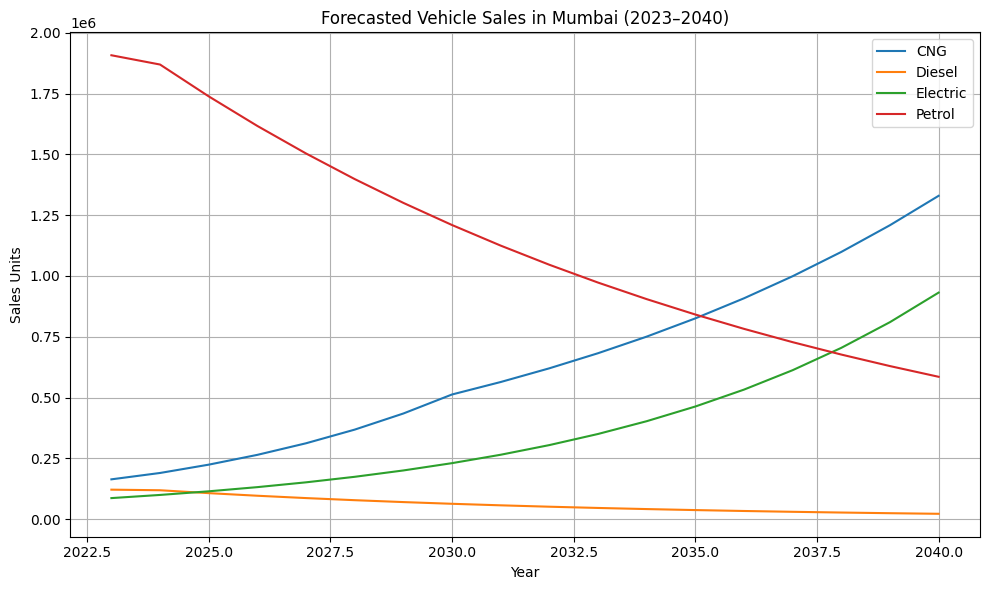

In [ ]:
# Forecasting Mumbai Fuel Trends with Crossover Detection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- SETTINGS ---
city_name = "Mumbai"  # Mumbai-focused forecast
policy_cutoffs = {
    "EV_Car": {"rate": 0.15, "end_year": 2025},
    "EV_2W": {"rate": 0.40, "end_year": 2025},
    "CNG": {
        "Delhi": {2023: 0.18, 2024: 0.20},
        "Mumbai": {2023: 0.14, 2024: 0.16}
    },
    "Ban": {
        "Delhi": 2024,
        "Mumbai": 2025
    }
}

# --- LOAD DATA ---
file_path = "/content/Vehicle_Sales_&_Trends_Data(overall india).csv"
df = pd.read_csv(file_path)

# --- CLEAN & FILTER ---
df_city = df[["Year", "Fuel Type", f"{city_name} Sales"]].copy()
df_city.rename(columns={f"{city_name} Sales": "Sales"}, inplace=True)

# Group by Year & Fuel Type
df_city = df_city.groupby(["Year", "Fuel Type"]).agg({"Sales": "sum"}).reset_index()

# --- SEPARATE FUEL TYPES ---
years = np.arange(2023, 2031)
fuel_groups = df_city.groupby("Fuel Type")
fuel_forecasts = {}

for fuel, group in fuel_groups:
    past = group.set_index("Year")["Sales"].reindex(years, fill_value=0)
    forecast = pd.Series(index=years, dtype='float64')

    # EV Growth
    if "Electric" in fuel:
        base = max(past[2023], 5000)
        for y in years:
            if y == 2023:
                forecast[y] = base
            elif y <= policy_cutoffs["EV_Car"]["end_year"]:
                forecast[y] = forecast[y - 1] * (1 + policy_cutoffs["EV_Car"]["rate"])
            else:
                forecast[y] = forecast[y - 1] * 1.15

    # CNG Growth
    elif "CNG" in fuel:
        base = max(past[2023], 10000)
        for y in years:
            promo = policy_cutoffs["CNG"][city_name].get(y, 0.18)
            base = base * (1 + promo)
            forecast[y] = max(base, 10000)

    # Petrol & Diesel Decline
    elif fuel in ["Petrol", "Diesel"]:
        start = policy_cutoffs["Ban"][city_name]
        decline_rate = 0.07 if fuel == "Petrol" else 0.10
        for y in years:
            if y == 2023:
                forecast[y] = past[y] if past[y] > 0 else 100000
            elif y < start:
                forecast[y] = forecast[y - 1] * 0.98
            else:
                forecast[y] = max(forecast[y - 1] * (1 - decline_rate), 50000)

    fuel_forecasts[fuel] = forecast

# --- EXTEND FORECAST TO 2040 ---
extended_years = np.arange(2023, 2041)
for fuel in fuel_forecasts:
    current = fuel_forecasts[fuel]
    if extended_years[-1] not in current:
        extended = current.copy()
        for y in range(2031, 2041):
            last_val = extended[y - 1]
            if fuel == "Electric":
                next_val = last_val * 1.15
            elif fuel == "CNG":
                next_val = last_val * 1.10
            elif fuel == "Petrol":
                next_val = last_val * (1 - 0.07)
            elif fuel == "Diesel":
                next_val = last_val * (1 - 0.10)
            else:
                next_val = last_val
            extended[y] = next_val
        fuel_forecasts[fuel] = extended

# --- FETCH SERIES ---
ev = fuel_forecasts.get("Electric", pd.Series(index=extended_years, dtype=float))
cng = fuel_forecasts.get("CNG", pd.Series(index=extended_years, dtype=float))
petrol = fuel_forecasts.get("Petrol", pd.Series(index=extended_years, dtype=float))
diesel = fuel_forecasts.get("Diesel", pd.Series(index=extended_years, dtype=float))

# --- CROSSOVER FINDER ---
def find_crossover(x, y):
    for year in extended_years:
        if x.get(year, 0) > y.get(year, 0):
            return year
    return None

# --- PRINT FORECASTS ---
print("\n--- Forecasted Sales Data (Mumbai) ---")
for fuel, forecast in fuel_forecasts.items():
    print(f"{fuel}: {forecast.values}")

# --- Summary Plot ---
plt.figure(figsize=(10, 6))
for fuel, forecast in fuel_forecasts.items():
    plt.plot(forecast.index, forecast.values, label=fuel)
plt.title(f"Forecasted Vehicle Sales in {city_name} (2023–2040)")
plt.xlabel("Year")
plt.ylabel("Sales Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
